In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
#import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
df=pd.read_csv('PGCB_Demand_Data_2021.csv')
df["DateTime"] = pd.to_datetime(df.date.astype(str) + ' ' + df.hour.astype(str), format='%m/%d/%Y %H')
df["DateTime"]=pd.to_datetime(df["DateTime"])
df.set_index("DateTime",inplace=True)
df

,date,year,month,day,weekday,hour,demand
DateTime,,,,,,,
2018-01-01 00:00:00,1/1/2018,2018,1,1,2,0,5673.00
2018-01-01 01:00:00,1/1/2018,2018,1,1,2,1,5183.00
2018-01-01 02:00:00,1/1/2018,2018,1,1,2,2,4908.00
2018-01-01 03:00:00,1/1/2018,2018,1,1,2,3,4786.00
2018-01-01 04:00:00,1/1/2018,2018,1,1,2,4,4599.00
...,...,...,...,...,...,...,...
2021-03-15 19:00:00,3/15/2021,2021,3,15,2,19,10321.02
2021-03-15 20:00:00,3/15/2021,2021,3,15,2,20,11242.00
2021-03-15 21:00:00,3/15/2021,2021,3,15,2,21,10994.12


In [3]:
df.shape

(28080, 7)

In [4]:
#sns.lineplot(x=df.index, y="demand", data=df);

In [5]:
#sns.lineplot(x='month', y="demand", data=df);

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(df["demand"],
                             model='additive'
                             )

In [7]:
trend=decomposed.trend
sesonal=decomposed.seasonal
residual=decomposed.resid

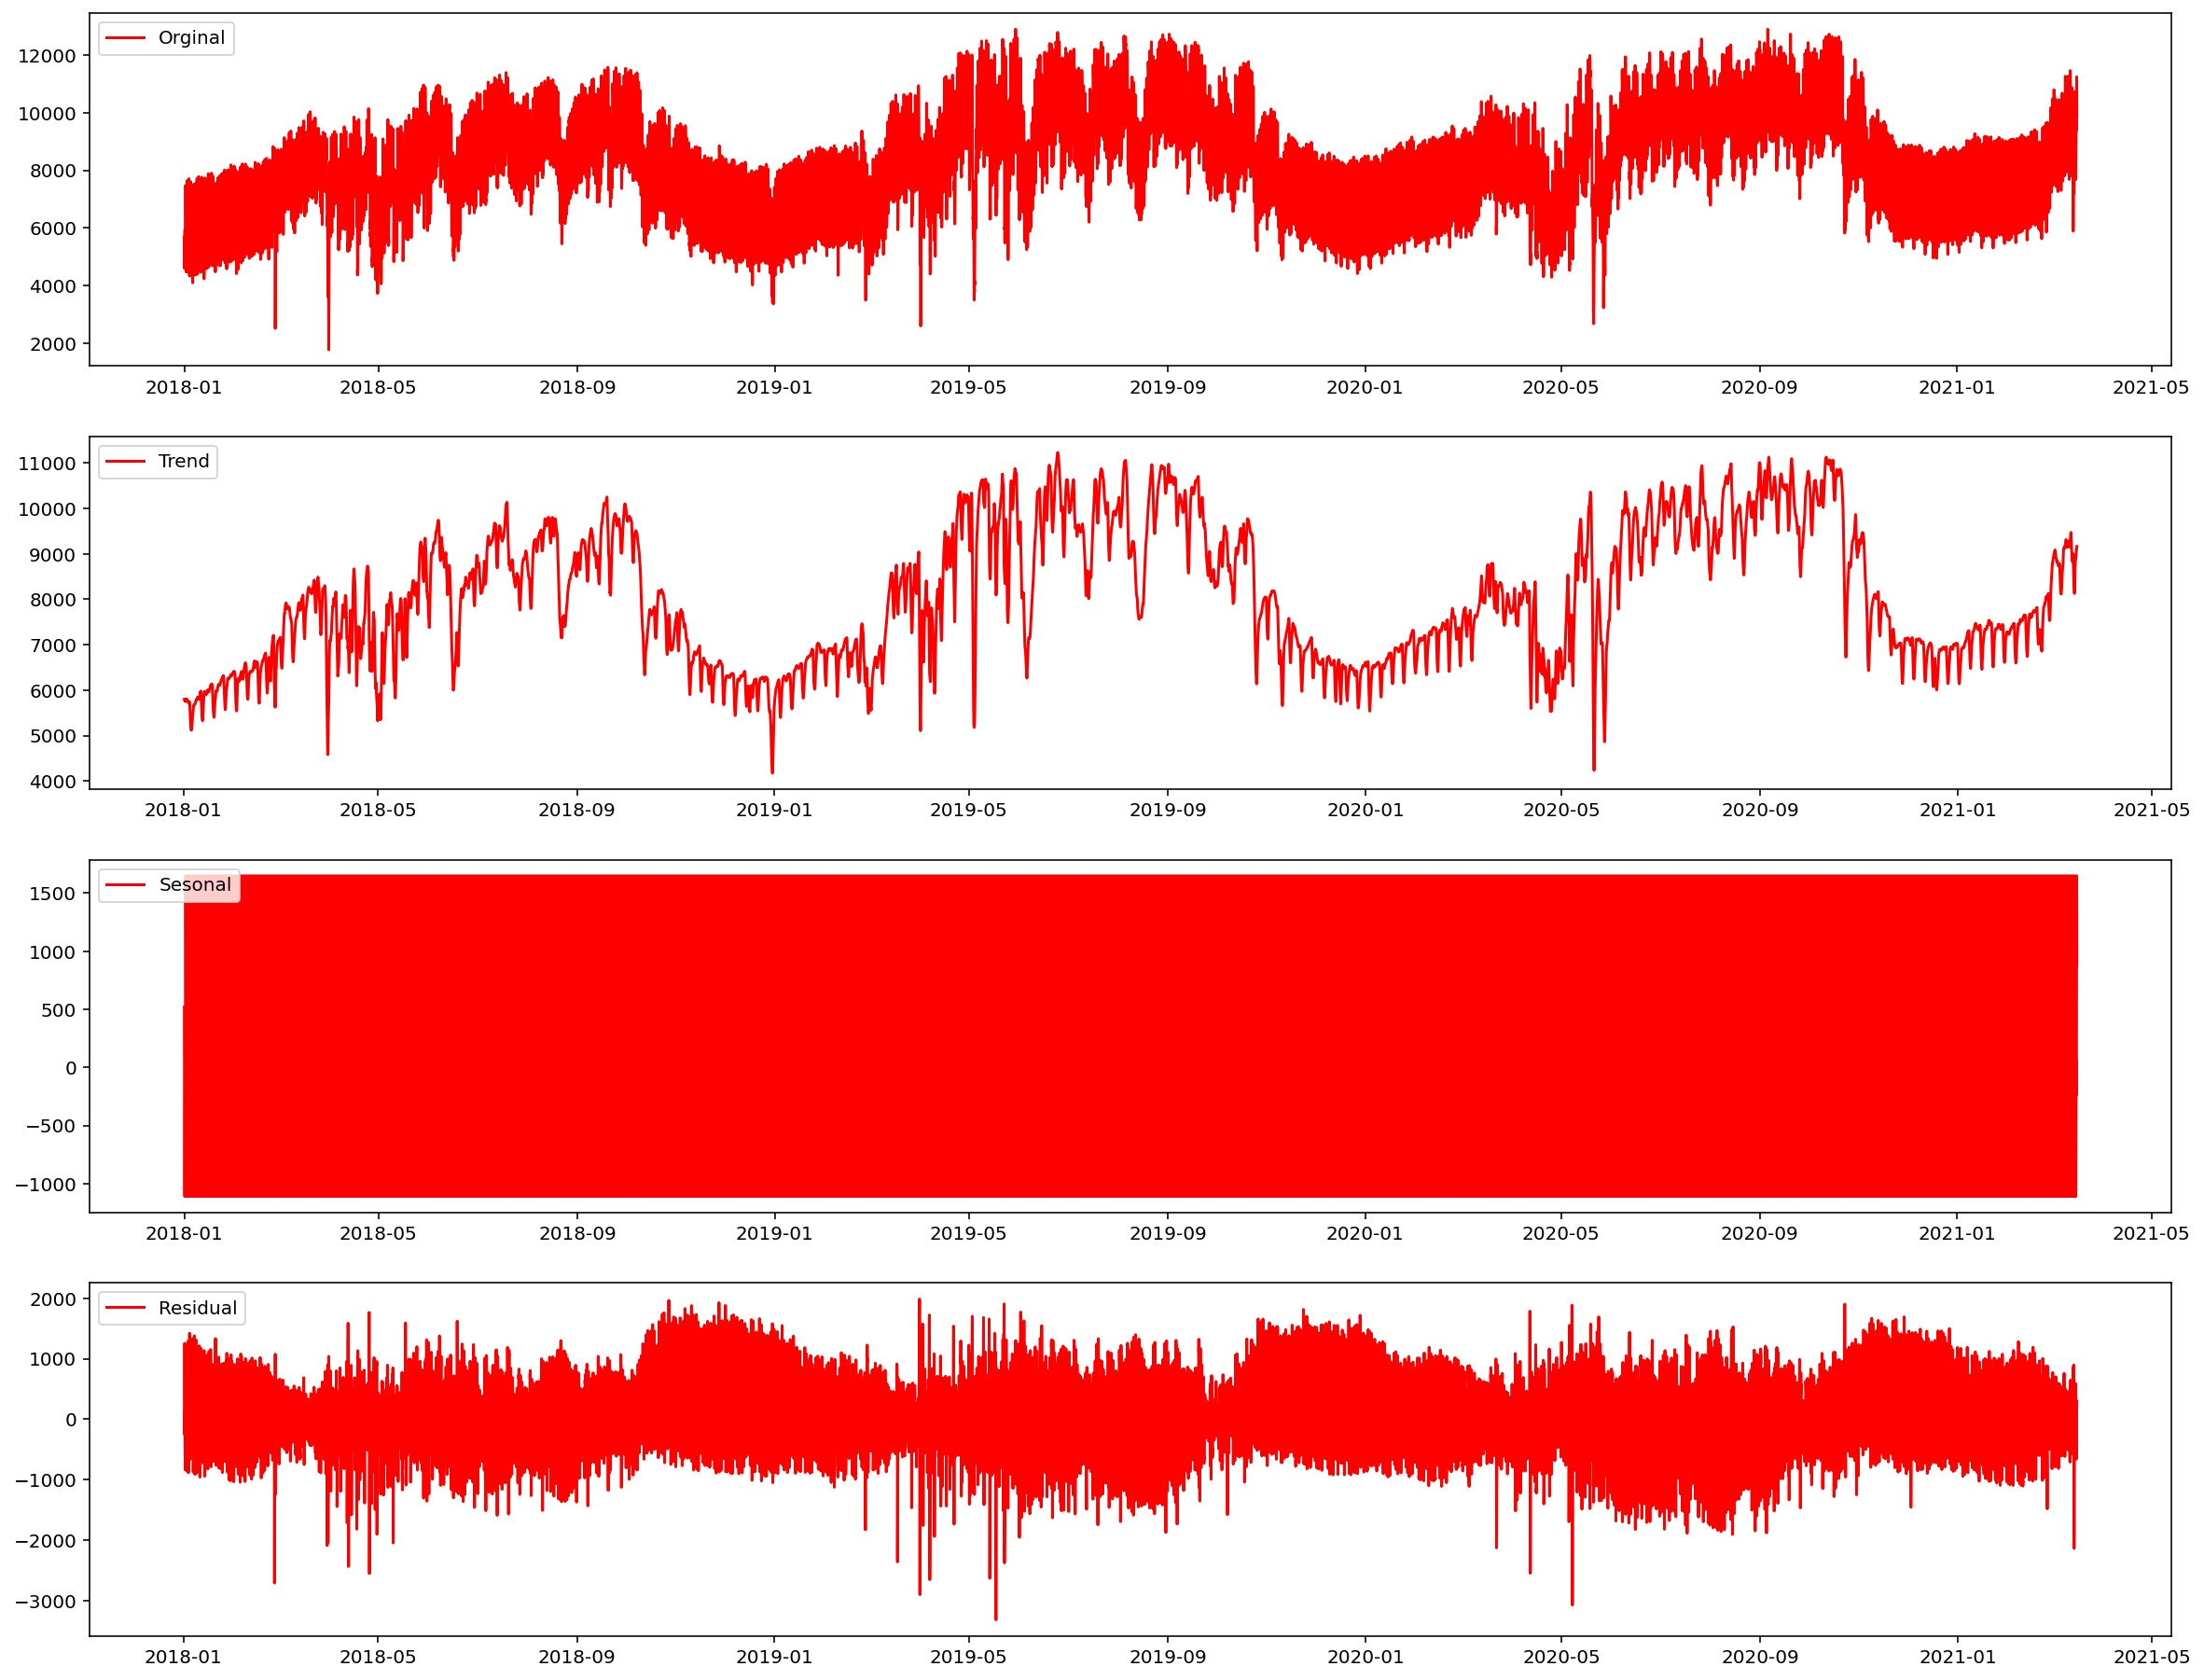

In [8]:
plt.figure(figsize=(20,16))
plt.subplot(411)
plt.plot(df["demand"],label="Orginal",color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal,label="Sesonal",color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

In [9]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler(feature_range=(0,1))
# X=scaler.fit_transform(df.demand.values.reshape(-1,1))
D_max_daily = df.groupby(df.index).demand.max().to_numpy()
df.demand= df.demand/max(D_max_daily)
D_max=max(D_max_daily)

In [10]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df.demand[0:training_size],df.demand[training_size:len(df)]

In [11]:
train=train_data.values.reshape(-1,1)
test=test_data.values.reshape(-1,1)

In [12]:
train.shape

(18252, 1)

In [13]:
test.shape

(9828, 1)

In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 24*7 # take time laps for 7 days
X_train, y_train = create_dataset(train, time_step)
X_test, ytest = create_dataset(test, time_step)

In [16]:
print(X_train.shape)
print(y_train.shape)

(18083, 168)
(18083,)


In [17]:
print(X_test.shape)
print(ytest.shape)

(9659, 168)
(9659,)


In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
#print(X_train[:3])
#print(y_train[:3])
#print(X_test.shape)
#print(len(X_train[1]))
print(X_train[0])

[[0.4400062 ]
 [0.40200109]
 [0.38067168]
 [0.37120918]
 [0.35670519]
 [0.35631738]
 [0.37710385]
 [0.40262158]
 [0.43395641]
 [0.45970682]
 [0.44365159]
 [0.446056  ]
 [0.45024432]
 [0.45520825]
 [0.43201737]
 [0.4321725 ]
 [0.43038858]
 [0.45869852]
 [0.5668192 ]
 [0.57360583]
 [0.58039246]
 [0.55890793]
 [0.51260374]
 [0.47863182]
 [0.43054371]
 [0.3909098 ]
 [0.36291011]
 [0.3564725 ]
 [0.34840611]
 [0.34685488]
 [0.3655472 ]
 [0.39641666]
 [0.43845498]
 [0.45032188]
 [0.44528038]
 [0.44093694]
 [0.45326922]
 [0.45986194]
 [0.44194524]
 [0.44559063]
 [0.44070426]
 [0.47351276]
 [0.5654231 ]
 [0.57919026]
 [0.59295742]
 [0.56480261]
 [0.5221438 ]
 [0.45924145]
 [0.42309781]
 [0.39789033]
 [0.37144187]
 [0.36686574]
 [0.34770806]
 [0.3520515 ]
 [0.36764136]
 [0.39292639]
 [0.4291476 ]
 [0.45978438]
 [0.44915846]
 [0.43232762]
 [0.44326379]
 [0.45164043]
 [0.42674319]
 [0.4400062 ]
 [0.44210036]
 [0.46342977]
 [0.56759482]
 [0.58268052]
 [0.59776623]
 [0.57915148]
 [0.51880866]
 [0.45

In [20]:
X_train

array([[[0.4400062 ],
        [0.40200109],
        [0.38067168],
        ...,
        [0.55247033],
        [0.50888079],
        [0.45559606]],

       [[0.40200109],
        [0.38067168],
        [0.37120918],
        ...,
        [0.50888079],
        [0.45559606],
        [0.41503141]],

       [[0.38067168],
        [0.37120918],
        [0.35670519],
        ...,
        [0.45559606],
        [0.41503141],
        [0.37702629]],

       ...,

       [[0.45280385],
        [0.46622198],
        [0.45365702],
        ...,
        [0.43915303],
        [0.45094237],
        [0.47925231]],

       [[0.46622198],
        [0.45365702],
        [0.44791747],
        ...,
        [0.45094237],
        [0.47925231],
        [0.50042659]],

       [[0.45365702],
        [0.44791747],
        [0.46342977],
        ...,
        [0.47925231],
        [0.50042659],
        [0.51826573]]])

In [22]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, MaxPooling1D, Bidirectional,GRU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard

from keras.layers import TimeDistributed

from keras.layers import RepeatVector
from keras.layers import TimeDistributed


In [57]:
model=Sequential()
model.add(LSTM(50,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(RepeatVector(168))

model.add(LSTM(50,return_sequences=True))

model.add(TimeDistributed(Dense(100, activation='relu')))
model.add(LSTM(50))

model.add(Dense(1))

model.compile(loss='mean_absolute_percentage_error',optimizer='adam')

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                10400     
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 168, 50)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 168, 50)           20200     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 168, 100)          5100      
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 65,951
Trainable params: 65,951
Non-trainable params: 0
__________________________________________________

In [59]:
import time
start_time = time.time()
history=model.fit(X_train,y_train,epochs = 30, batch_size=64,validation_split=0.1)
finish_time = time.time()
print("--- %s seconds ---" % (finish_time - start_time))

Epoch 1/30
255/255 [==============================] - 45s 178ms/step - loss: 9.1402 - val_loss: 5.5753
Epoch 2/30
255/255 [==============================] - 44s 174ms/step - loss: 4.4266 - val_loss: 4.1678
Epoch 3/30
255/255 [==============================] - 46s 181ms/step - loss: 4.0166 - val_loss: 4.1777
Epoch 4/30
255/255 [==============================] - 45s 177ms/step - loss: 3.7268 - val_loss: 3.5659
Epoch 5/30
255/255 [==============================] - 57s 222ms/step - loss: 3.6618 - val_loss: 3.1655
Epoch 6/30
255/255 [==============================] - 62s 242ms/step - loss: 3.3245 - val_loss: 3.5018
Epoch 7/30
255/255 [==============================] - 70s 276ms/step - loss: 3.3171 - val_loss: 3.0527
Epoch 8/30
255/255 [==============================] - 84s 331ms/step - loss: 3.1839 - val_loss: 3.1149
Epoch 9/30
255/255 [==============================] - 83s 327ms/step - loss: 3.1468 - val_loss: 3.9635
Epoch 10/30
255/255 [==============================] - 58s 227ms/step - l

In [60]:
print((finish_time - start_time)/60,'minutes')
scores = model.evaluate(X_test, ytest)
print("TEST MAPE :",scores)

28.145317494869232 minutes
302/302 [==============================] - 11s 38ms/step - loss: 2.5230
TEST MAPE : 2.523038148880005


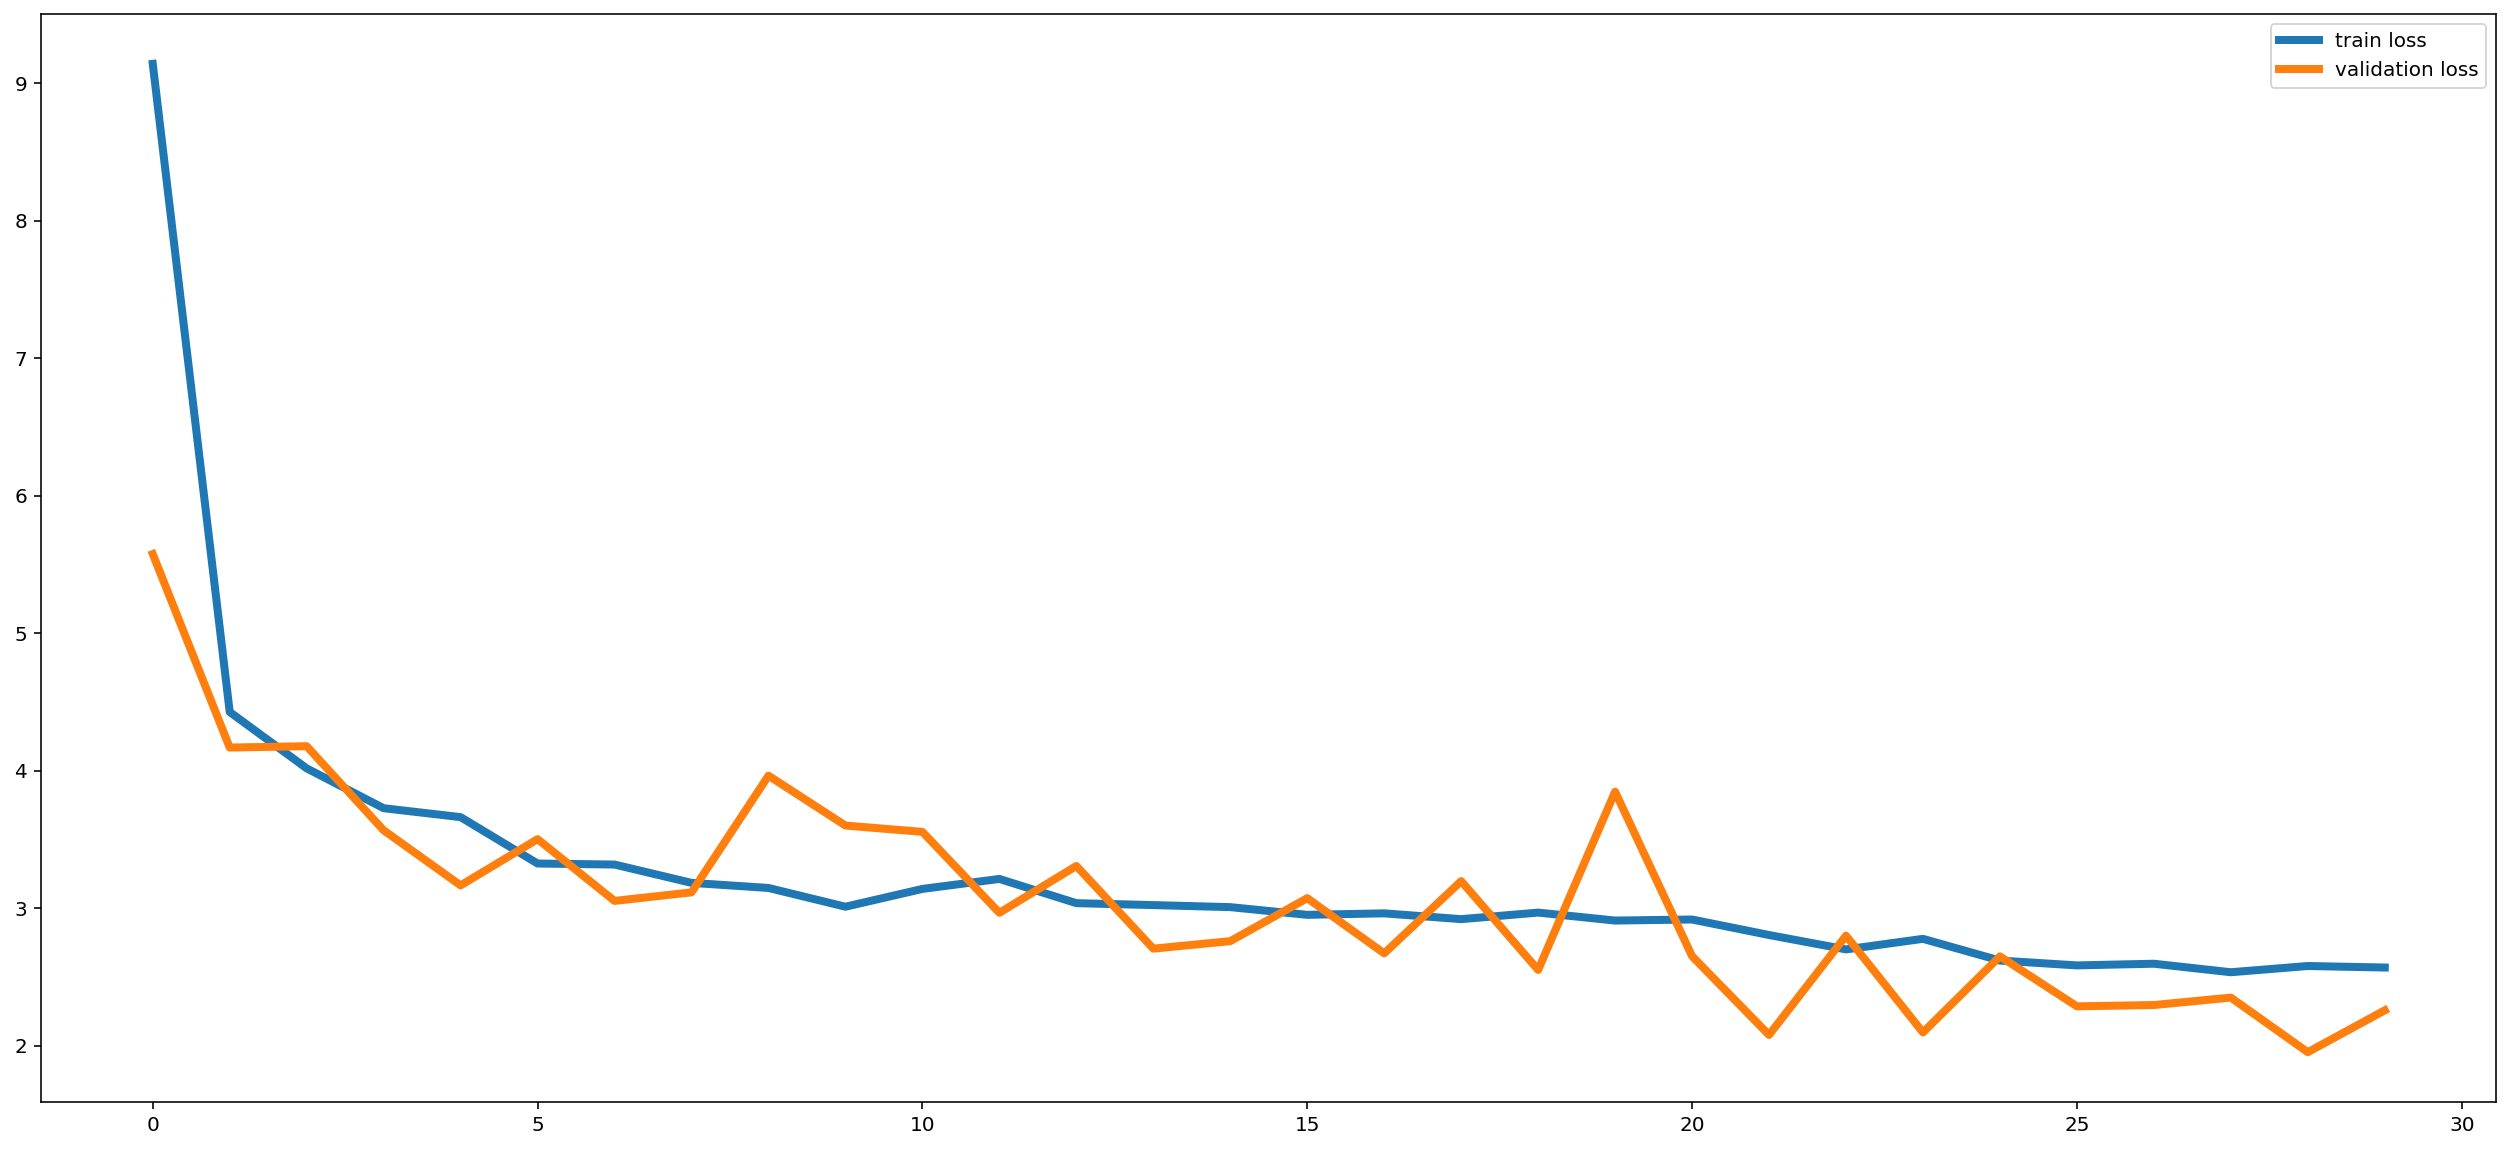

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], linewidth =4)
plt.plot(history.history['val_loss'], linewidth =4)
#plt.grid(False)
a =  plt.legend(['train loss','validation loss'])



plt.show()

In [62]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [64]:
test_predict

array([[0.48958313],
       [0.49879688],
       [0.50872797],
       ...,
       [0.83501565],
       [0.86918736],
       [0.8354485 ]], dtype=float32)

In [65]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train*D_max,train_predict*D_max))

268.3648760021551

In [66]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest*D_max,test_predict*D_max))

286.14666128497015

In [67]:
train_predict.shape

(18083, 1)

In [68]:
y_train_rs=y_train.reshape(-1,1)
y_train_rs.shape

(18083, 1)

In [69]:
df.demand.shape

(28080,)

In [70]:
train_predict.shape

(18083, 1)

In [71]:
test_predict.shape

(9659, 1)

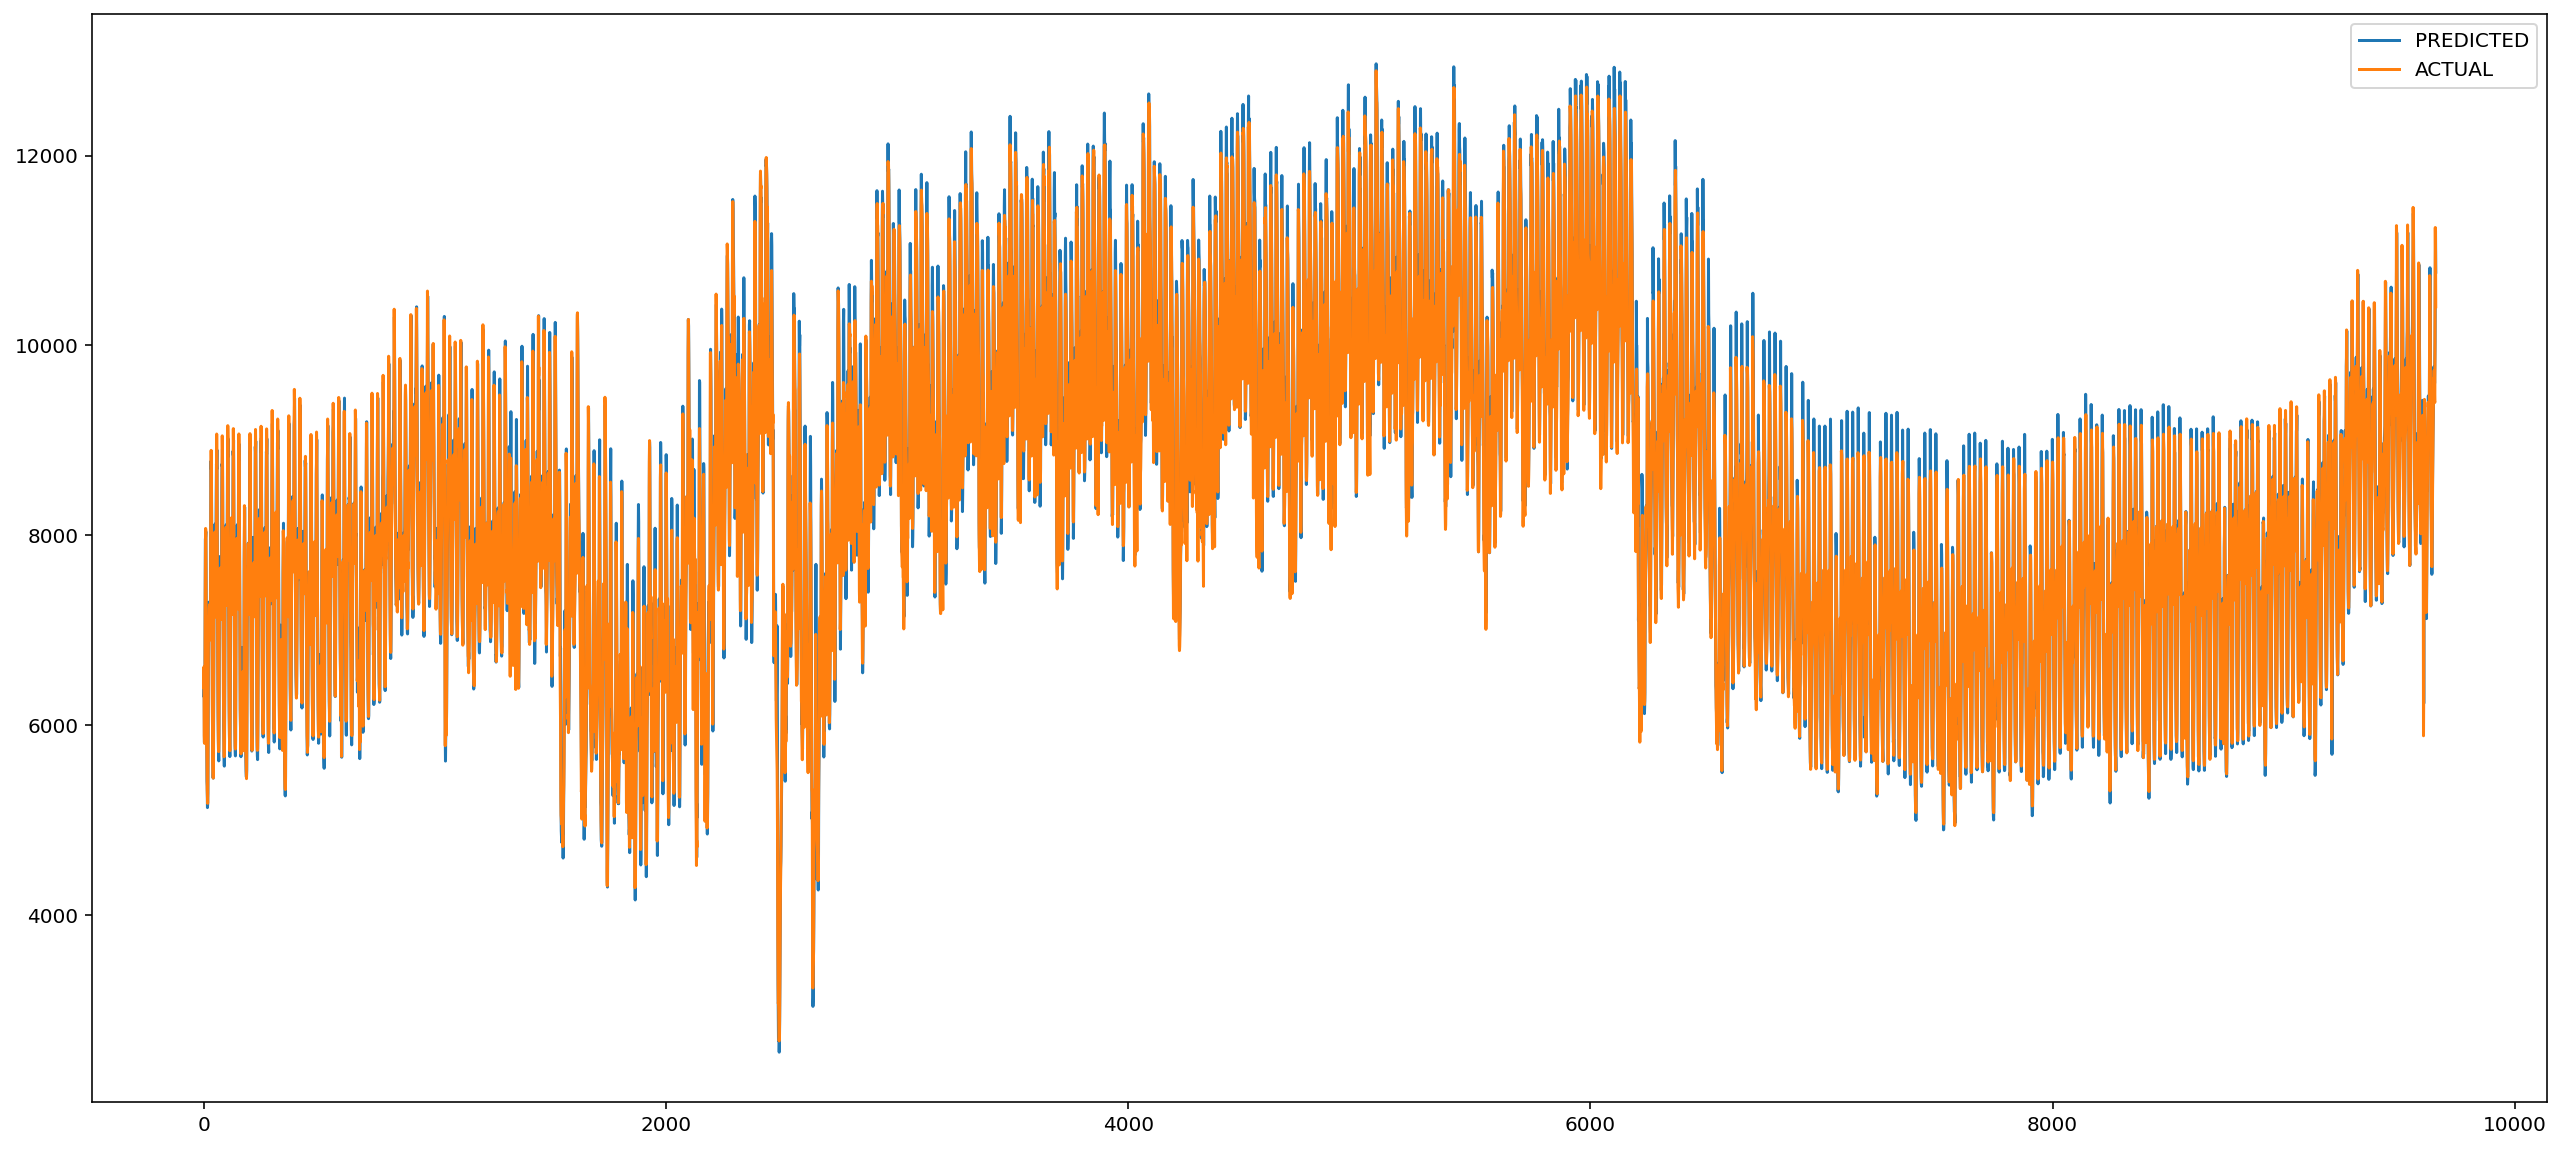

In [72]:
plt.plot(test_predict*D_max)
plt.plot(ytest*D_max)
plt.legend(['PREDICTED','ACTUAL'])

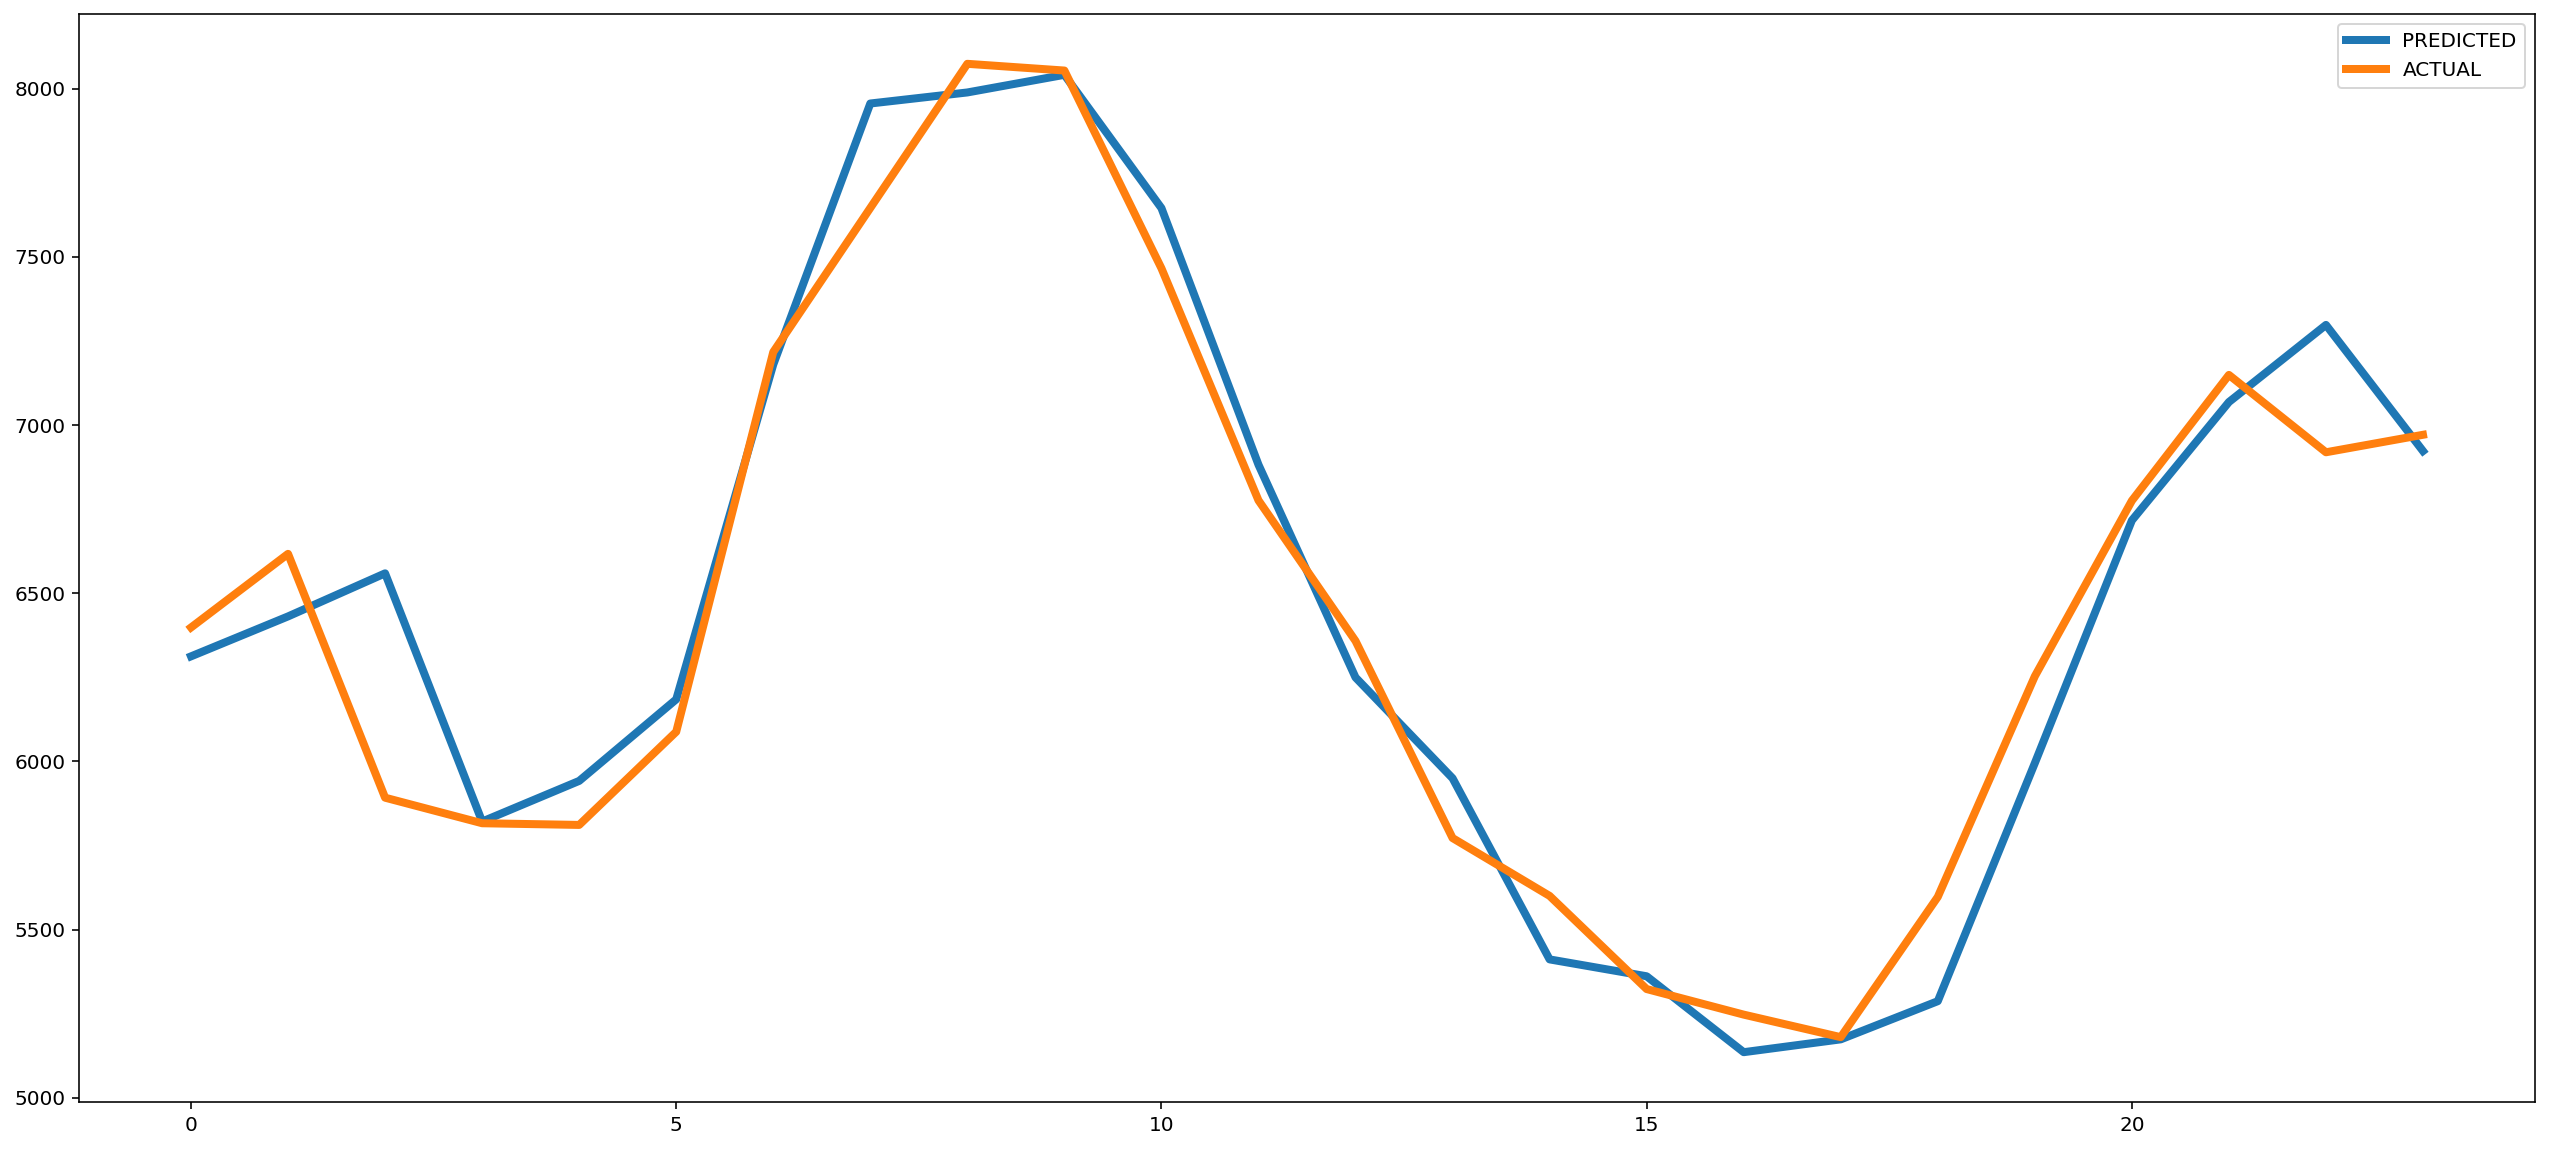

In [73]:
plt.plot(test_predict[:24]*D_max, linewidth = 4)
plt.plot(ytest[:24]*D_max, linewidth = 4)
plt.grid(False)
plt.legend(['PREDICTED','ACTUAL'])


In [74]:
nsamples, nx, ny = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny))

In [75]:
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=1,min_samples_leaf=100)
cls.fit(d2_train_dataset,y_train)

RandomForestRegressor(min_samples_leaf=100, n_estimators=1)

In [76]:
nsamples, nx, ny = X_test.shape
d2_test_dataset = X_test.reshape((nsamples,nx*ny))

In [77]:
sk_pred=cls.predict(d2_test_dataset)

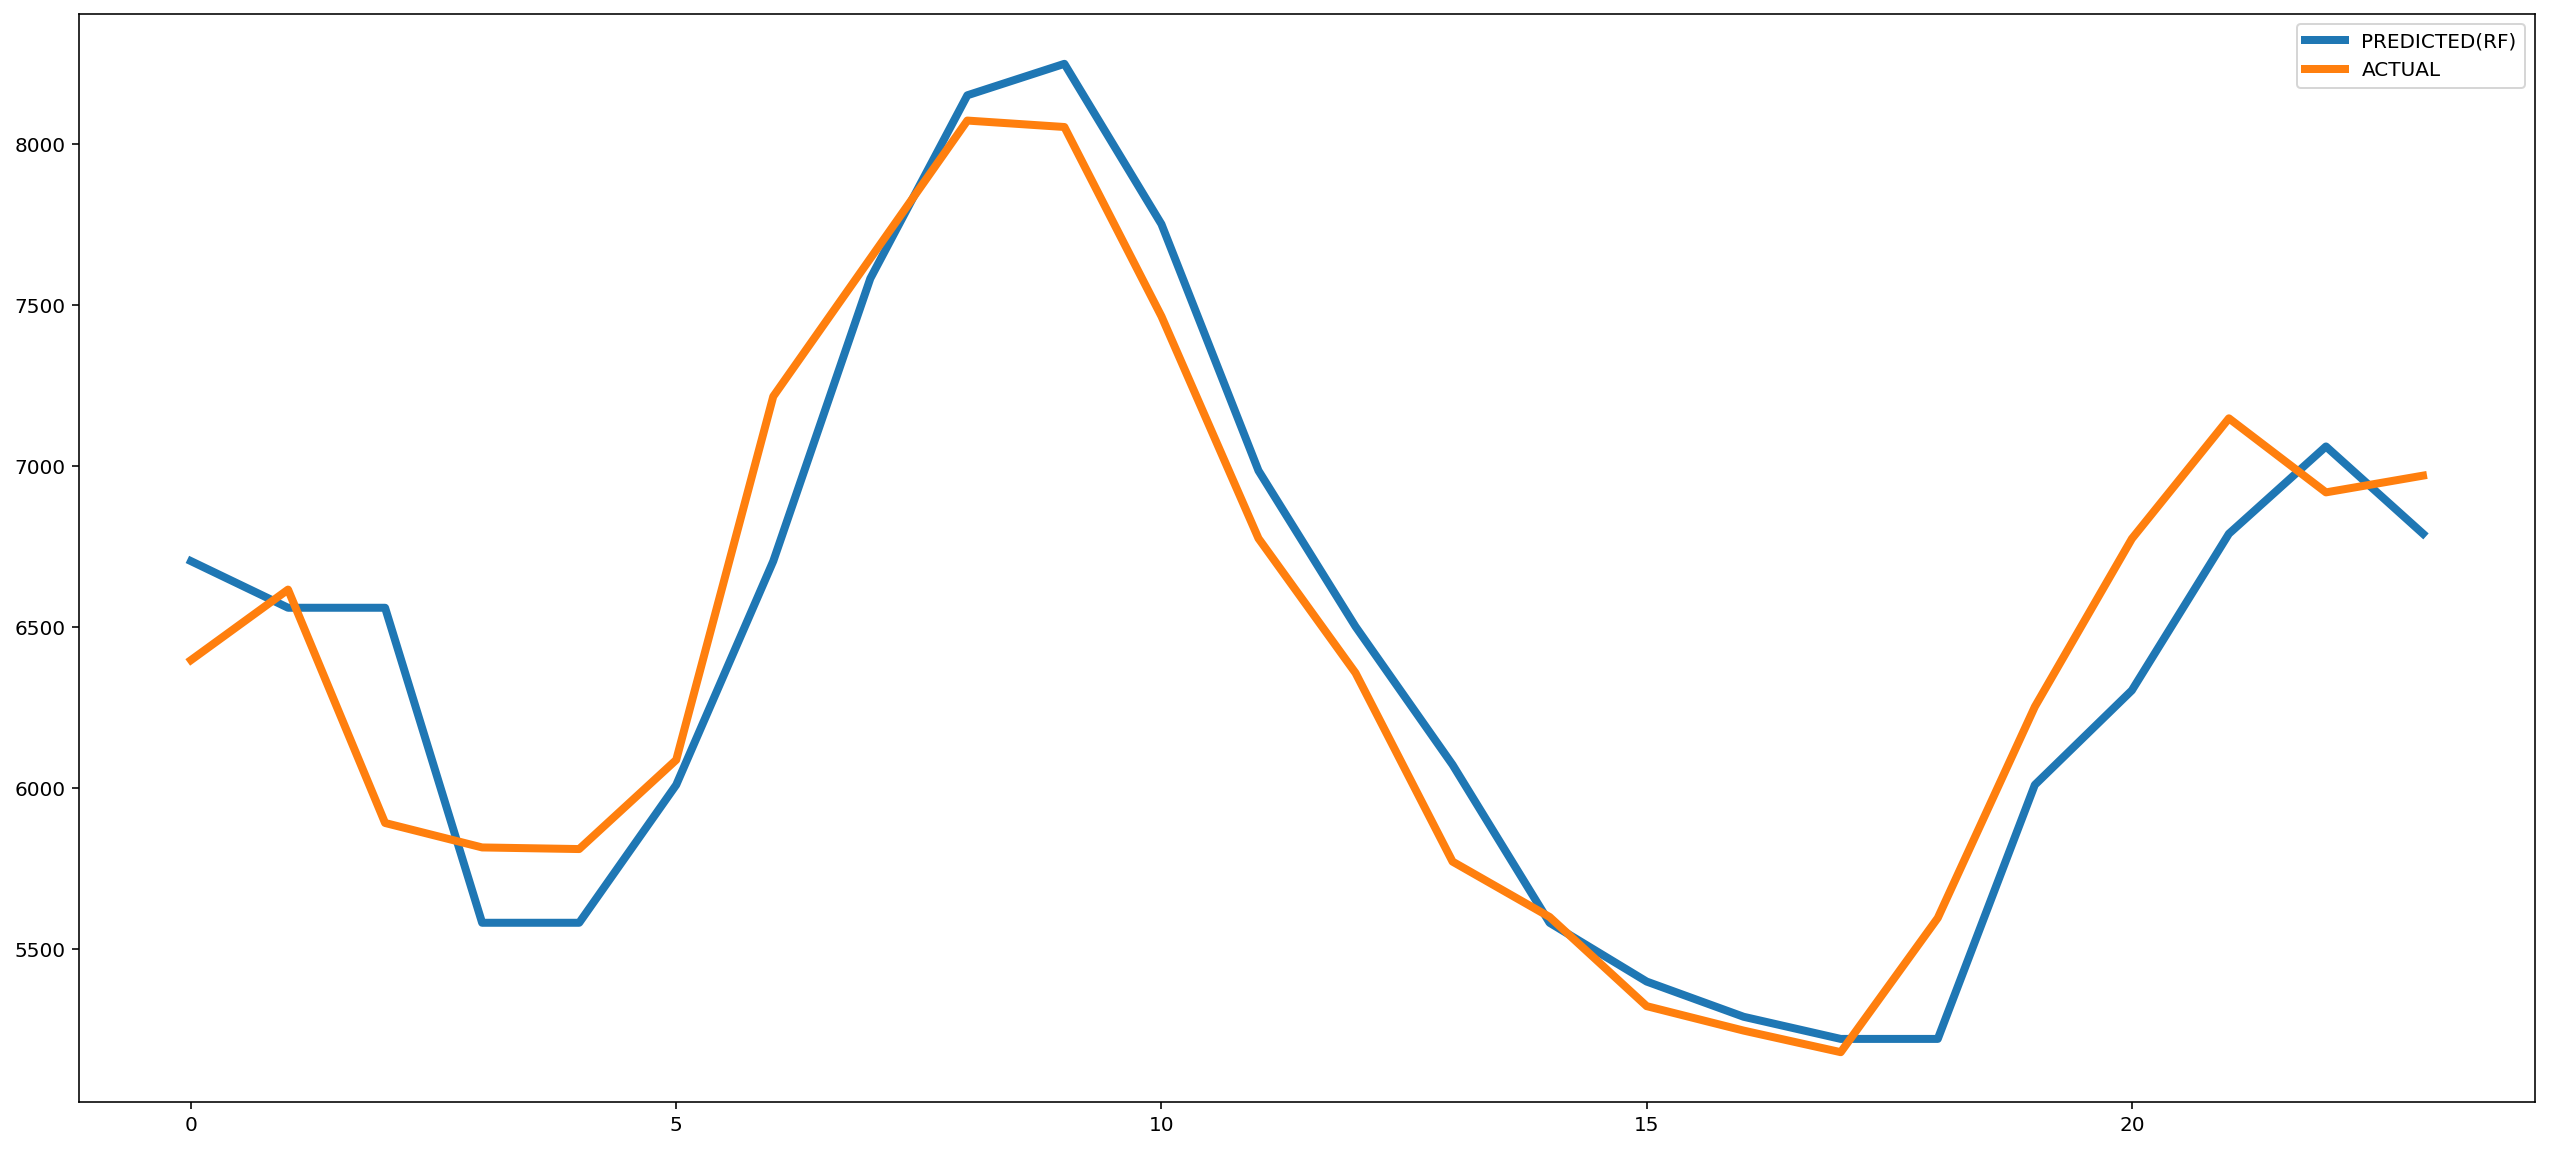

In [78]:
plt.plot(sk_pred[0:24]*D_max, linewidth = 4)
plt.plot(ytest[0:24]*D_max, linewidth = 4)
plt.grid(False)

plt.legend(['PREDICTED(RF)','ACTUAL'])

In [79]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error

In [80]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [81]:
MAPE_RF=mean_absolute_percentage_error(ytest,sk_pred)
MAPE_RF

3.375798948058543

In [82]:
cls.score(d2_test_dataset,ytest)

0.9528331839565265

In [83]:
cls.feature_importances_

array([0.00000000e+00, 3.76304993e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.06519902e-04,
       2.96964746e-04, 5.16745161e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.33248178e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.01018505e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [84]:
importance = cls.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00376
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00021
Feature: 20, Score: 0.00030
Feature: 21, Score: 0.00005
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00013
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

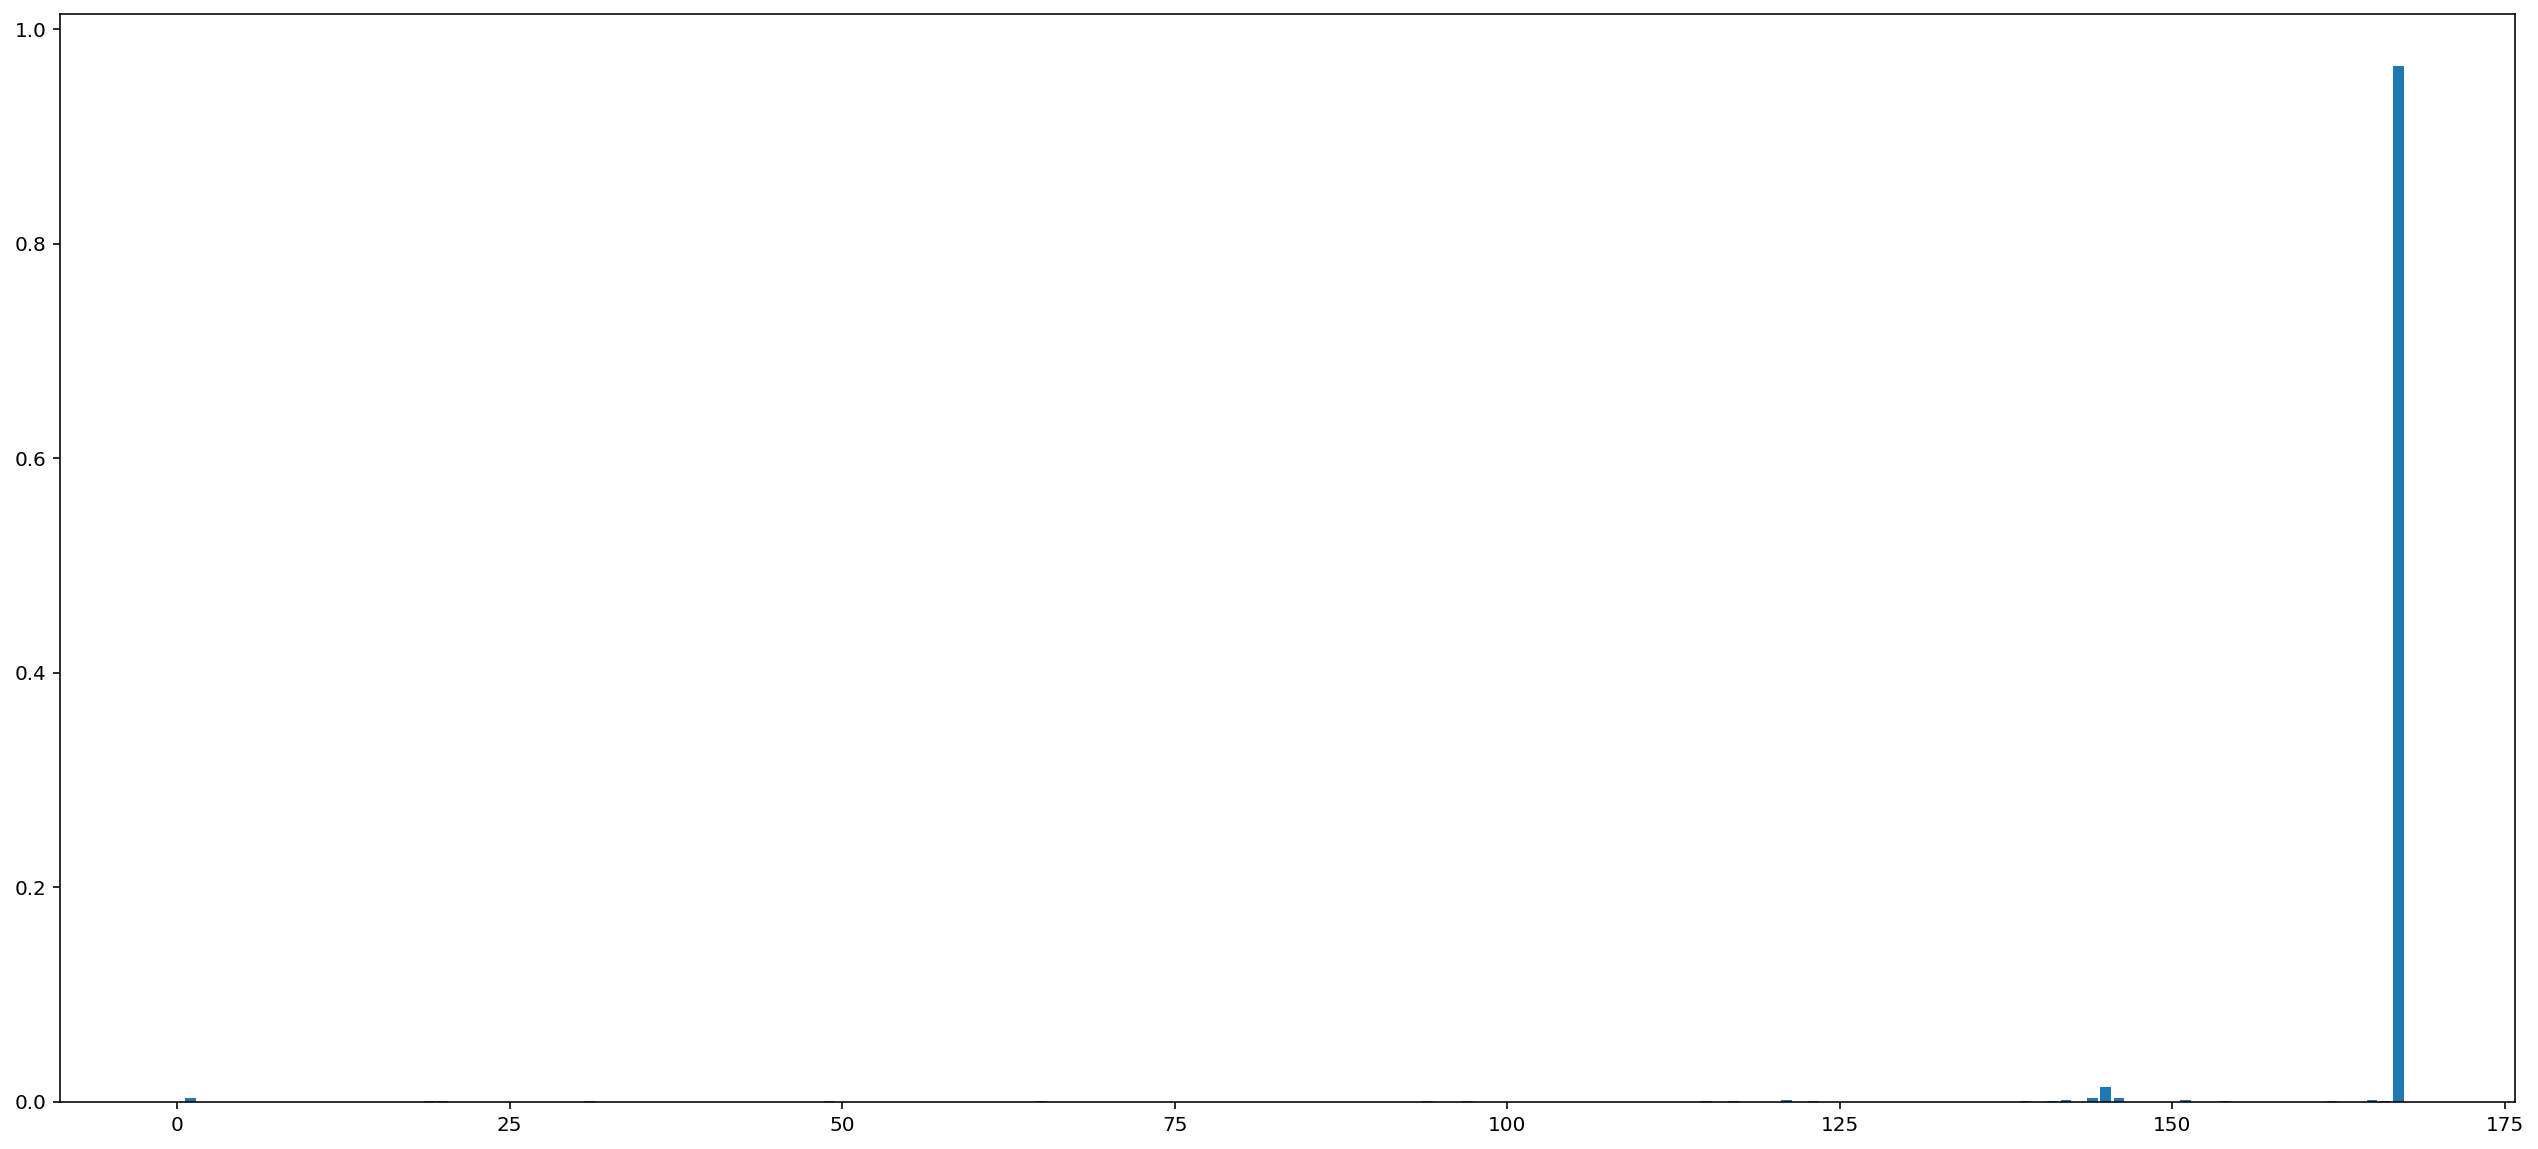

In [85]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [86]:
cls.feature_importances_

array([0.00000000e+00, 3.76304993e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.06519902e-04,
       2.96964746e-04, 5.16745161e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.33248178e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.01018505e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [87]:
# Main function for calculating Mean Absolute Percentage Error
import sklearn.metrics
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [88]:
MAPE_RF=mean_absolute_percentage_error(ytest,sk_pred)
MAPE_RF

3.375798948058543

In [89]:
cls.score(d2_test_dataset,ytest)

0.9528331839565265

In [90]:
# #Function for calculating LSTM model MAPE value
# def LSTM_MAEP_RMSE(month,year):
#   year_dict = {2018: 1, 2019: 2, 2020: 3}

#   month_seq = {
#       "jan": 1,
#       "feb": 2,
#       "mar": 3,
#       "apr": 4,
#       "may": 5,
#       "jun": 6,
#       "jul": 7,
#       "aug": 8,
#       "sep": 9,
#       "oct": 10,
#       "nov": 11,
#       "dec": 12,
#   }

#   month_dict = {
#       "jan": (0, 31),
#       "feb": (31, 59),
#       "mar": (59, 90),
#       "apr": (90, 120),
#       "may": (120, 151),
#       "jun": (151, 181),
#       "jul": (181, 212),
#       "aug": (212, 243),
#       "sep": (243, 273),
#       "oct": (273, 304),
#       "nov": (304, 334),
#       "dec": (334, 365)
#   } 

#   st = year_dict[year]*365+(month_dict[month][0] + (1 if year == 2020 and month_seq[month] > 2 else 0))*24
#   en = year_dict[year]*365+(month_dict[month][1] + (1 if year == 2020 and month_seq[month] >= 2 else 0))*24
#   test_y_jan = []
#   true_y_jan = []
#   for i in range(st, en):
#       test = X_train[i]
#       true_y_jan.append(ytest[i])
#       test = test.reshape(1,1,5)
#       y = model.predict(test)
#       test_y_jan.append(y[0][0])
#   return mean_absolute_percentage_error(true_y_jan,test_y_jan)

In [91]:
# #Function for calculating RF model MAPE value
# def RF_MAPE_RMSE(month,year):
#   year_dict = {2018: 1, 2019: 2, 2020: 3}

#   month_seq = {
#       "jan": 1,
#       "feb": 2,
#       "mar": 3,
#       "apr": 4,
#       "may": 5,
#       "jun": 6,
#       "jul": 7,
#       "aug": 8,
#       "sep": 9,
#       "oct": 10,
#       "nov": 11,
#       "dec": 12,
#   }

#   month_dict = {
#       "jan": (0, 31),
#       "feb": (31, 59),
#       "mar": (59, 90),
#       "apr": (90, 120),
#       "may": (120, 151),
#       "jun": (151, 181),
#       "jul": (181, 212),
#       "aug": (212, 243),
#       "sep": (243, 273),
#       "oct": (273, 304),
#       "nov": (304, 334),
#       "dec": (334, 365)
#   } 

#   st = year_dict[year]*365+(month_dict[month][0] + (1 if year == 2020 and month_seq[month] > 2 else 0))*24
#   en = year_dict[year]*365+(month_dict[month][1] + (1 if year == 2020 and month_seq[month] >= 2 else 0))*24
#   test_y_jan = []
#   true_y_jan = []
#   for i in range(st, en):
#     test = X_train[i]
#     true_y_jan.append(Y[i])
#     test = test.reshape(1,1*5)
#     y = cls.predict(test)
#     test_y_jan.append(y[0])
#   return mean_absolute_percentage_error(true_y_jan,test_y_jan)

In [92]:
# JANUARY_LSTM_MAPE=LSTM_MAEP_RMSE("jan",2020)
# MARCH_LSTM_MAPE=LSTM_MAEP_RMSE("mar",2020)
# JUNE_LSTM_MAPE=LSTM_MAEP_RMSE("jun",2020)
# SEPTEMBER_LSTM_MAPE=LSTM_MAEP_RMSE("sep",2020)
# DECEMBER_LSTM_MAPE=LSTM_MAEP_RMSE("dec",2020)

In [93]:
train.shape

(18252, 1)

In [94]:
gData=df.demand.values.reshape(-1,1)

In [95]:
gData[:10]

array([[0.4400062 ],
       [0.40200109],
       [0.38067168],
       [0.37120918],
       [0.35670519],
       [0.35631738],
       [0.37710385],
       [0.40262158],
       [0.43395641],
       [0.45970682]])

In [96]:
gX, gY = create_dataset(gData, time_step)

In [97]:
gX.shape

(27911, 168)

In [98]:
gY.shape

(27911,)

In [99]:
gX =gX.reshape(gX.shape[0],gX.shape[1] , 1)
gX.shape
pred_gX=model.predict(gX)

In [100]:
#Function for calculating LSTM model MAPE value
def LSTM_MAEP_RMSE(month,year):
  year_dict = {2018: 1, 2019: 2, 2020: 3}

  month_seq = {
      "jan": 1,
      "feb": 2,
      "mar": 3,
      "apr": 4,
      "may": 5,
      "jun": 6,
      "jul": 7,
      "aug": 8,
      "sep": 9,
      "oct": 10,
      "nov": 11,
      "dec": 12,
  }

  month_dict = {
      "jan": (0, 31),
      "feb": (31, 59),
      "mar": (59, 90),
      "apr": (90, 120),
      "may": (120, 151),
      "jun": (151, 181),
      "jul": (181, 212),
      "aug": (212, 243),
      "sep": (243, 273),
      "oct": (273, 304),
      "nov": (304, 334),
      "dec": (334, 365)
  } 

  st = year_dict[year]*365+(month_dict[month][0] + (1 if year == 2020 and month_seq[month] > 2 else 0))*24
  en = year_dict[year]*365+(month_dict[month][1] + (1 if year == 2020 and month_seq[month] >= 2 else 0))*24
  test_y_jan = []
  true_y_jan = []
  for i in range(st, en):
    test_y_jan.append(pred_gX[i])
    true_y_jan.append(gY[i])
      
  return mean_absolute_percentage_error(true_y_jan,test_y_jan)

In [101]:
pred_gX.shape

(27911, 1)

In [102]:
gY.shape

(27911,)

In [103]:
JANUARY_LSTM_MAPE=LSTM_MAEP_RMSE("jan",2020)
MARCH_LSTM_MAPE=LSTM_MAEP_RMSE("mar",2020)
JUNE_LSTM_MAPE=LSTM_MAEP_RMSE("jun",2020)
SEPTEMBER_LSTM_MAPE=LSTM_MAEP_RMSE("sep",2020)
DECEMBER_LSTM_MAPE=LSTM_MAEP_RMSE("dec",2020)

In [104]:
print(JANUARY_LSTM_MAPE)
print(JUNE_LSTM_MAPE)
print(DECEMBER_LSTM_MAPE)
print(SEPTEMBER_LSTM_MAPE)
print(DECEMBER_LSTM_MAPE)

2.1656568153830644
2.2374175127616684
2.476441691317544
2.4348534042112786
2.476441691317544


In [105]:

def LSTM_MONTH_PLOT(month,year):

  year_dict = {2018: 1, 2019: 2, 2020: 3}

  month_seq = {
      "jan": 1,
      "feb": 2,
      "mar": 3,
      "apr": 4,
      "may": 5,
      "jun": 6,
      "jul": 7,
      "aug": 8,
      "sep": 9,
      "oct": 10,
      "nov": 11,
      "dec": 12,
  }

  month_dict = {
      "jan": (0, 31),
      "feb": (31, 59),
      "mar": (59, 90),
      "apr": (90, 120),
      "may": (120, 151),
      "jun": (151, 181),
      "jul": (181, 212),
      "aug": (212, 243),
      "sep": (243, 273),
      "oct": (273, 304),
      "nov": (304, 334),
      "dec": (334, 365)
  } 

  st = year_dict[year]*365+(month_dict[month][0] + (1 if year == 2020 and month_seq[month] > 2 else 0))*24
  en = year_dict[year]*365+(month_dict[month][1] + (1 if year == 2020 and month_seq[month] >= 2 else 0))*24
  test_y = []
  true_y = []
  for i in range(st, en,24):
    test_y.append(pred_gX[i]*D_max)
    true_y.append(gY[i]*D_max)
  
  plt.plot(test_y,linewidth = 4)
  plt.plot(true_y,linewidth = 4) 
  #plt.suptitle(f"{month.upper()} Month prediction comparison")
  plt.legend(["PREDICTED", "ACTUAL"])

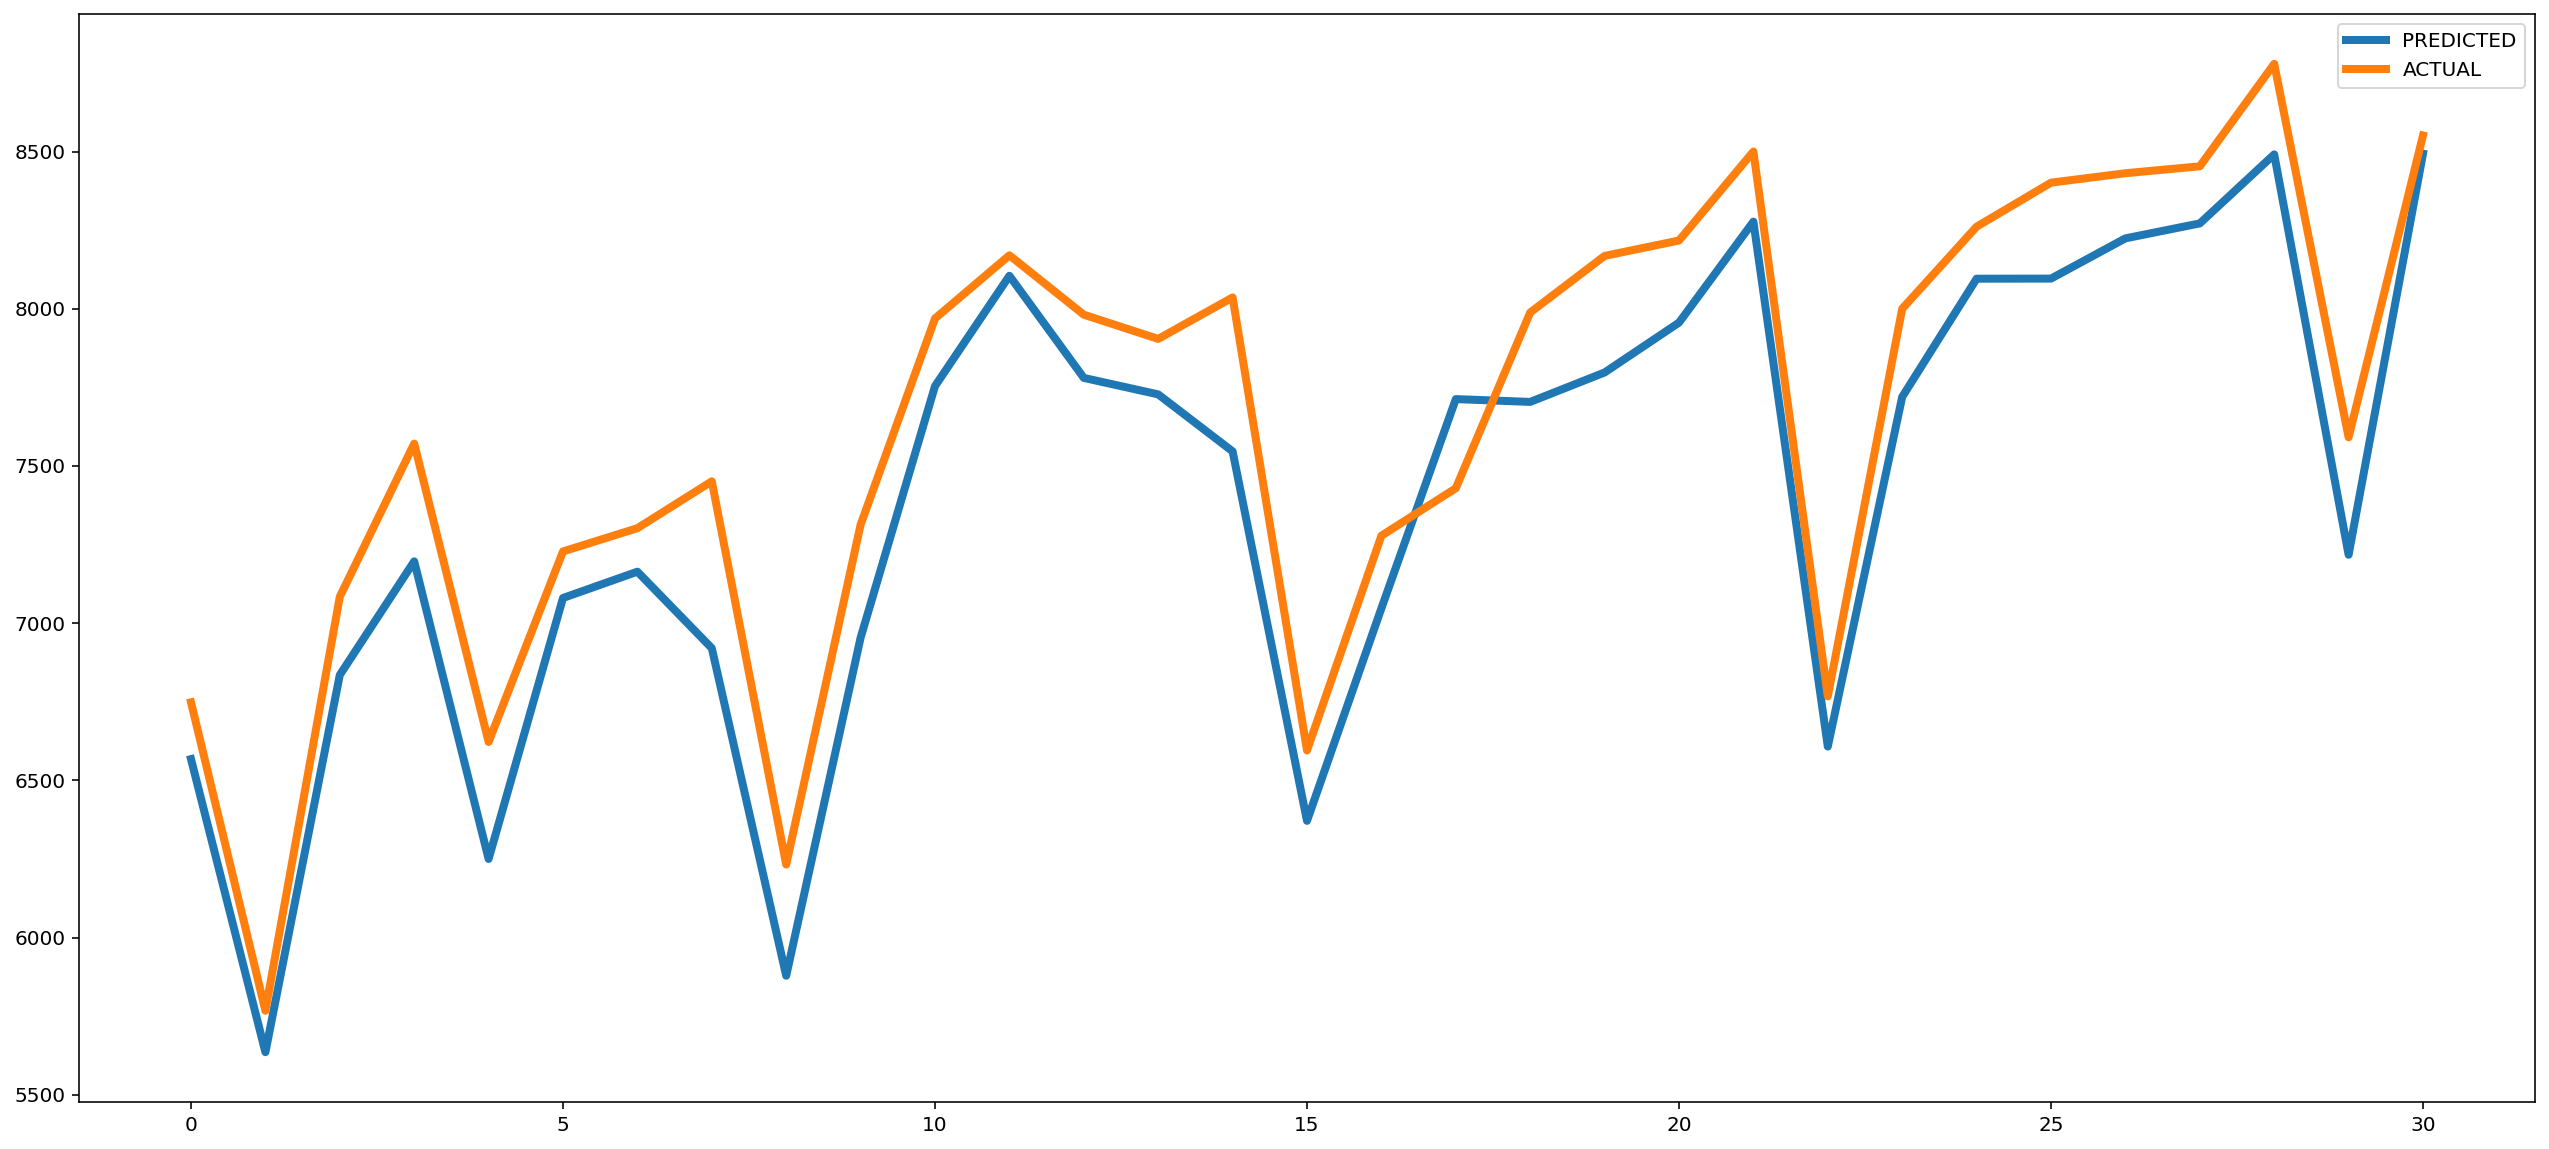

In [106]:
LSTM_MONTH_PLOT('jan',2020)



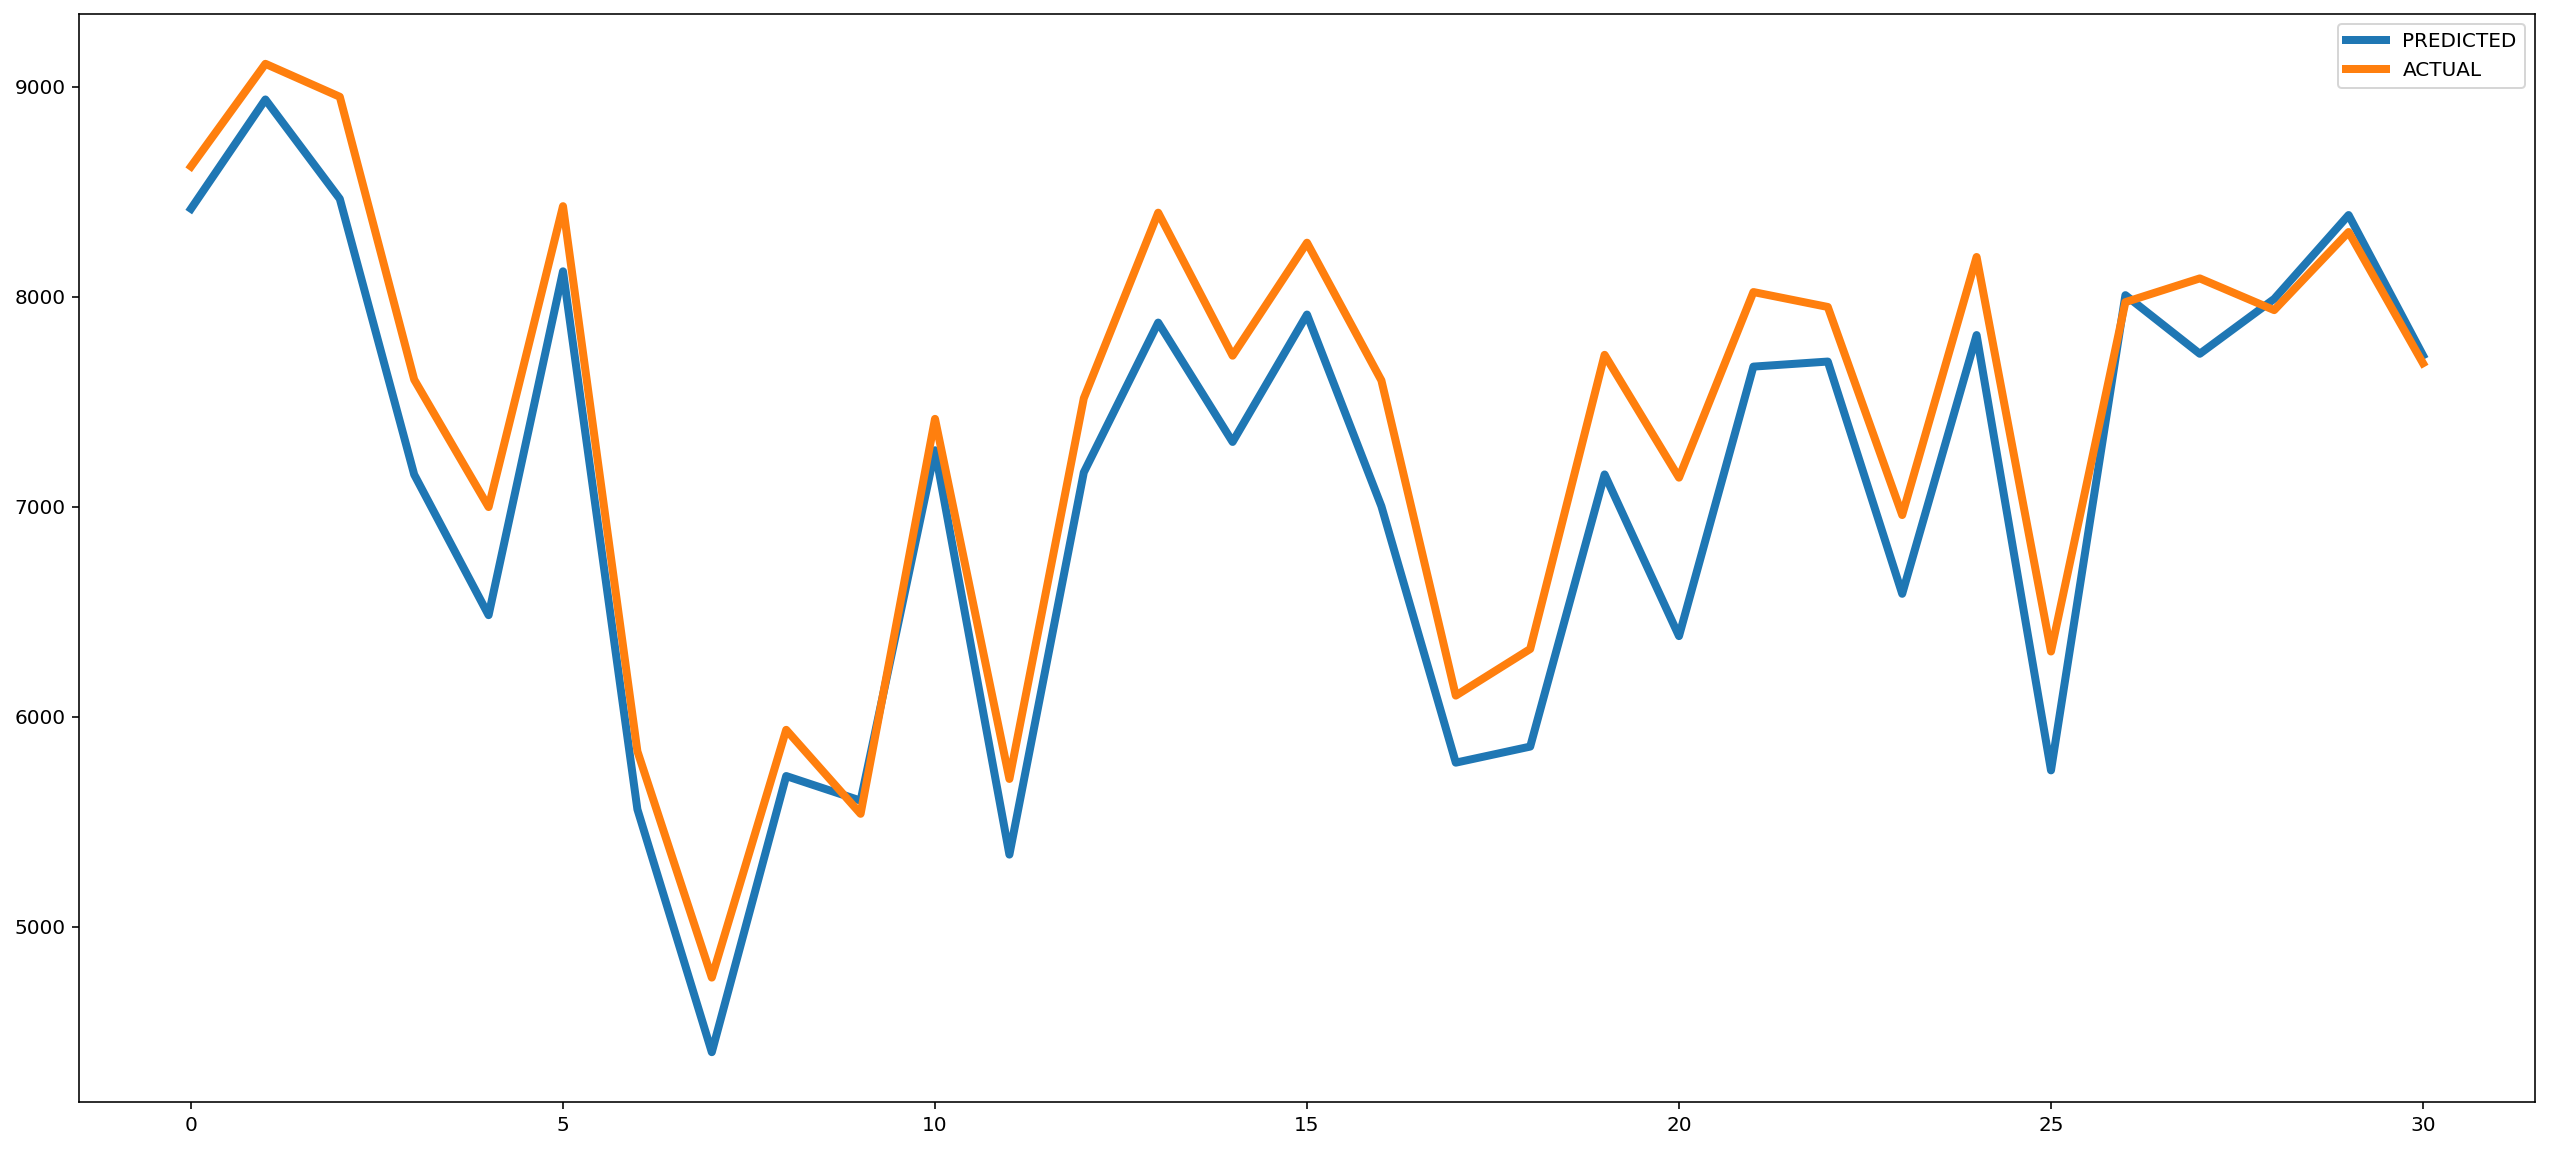

In [107]:
LSTM_MONTH_PLOT('mar',2020)

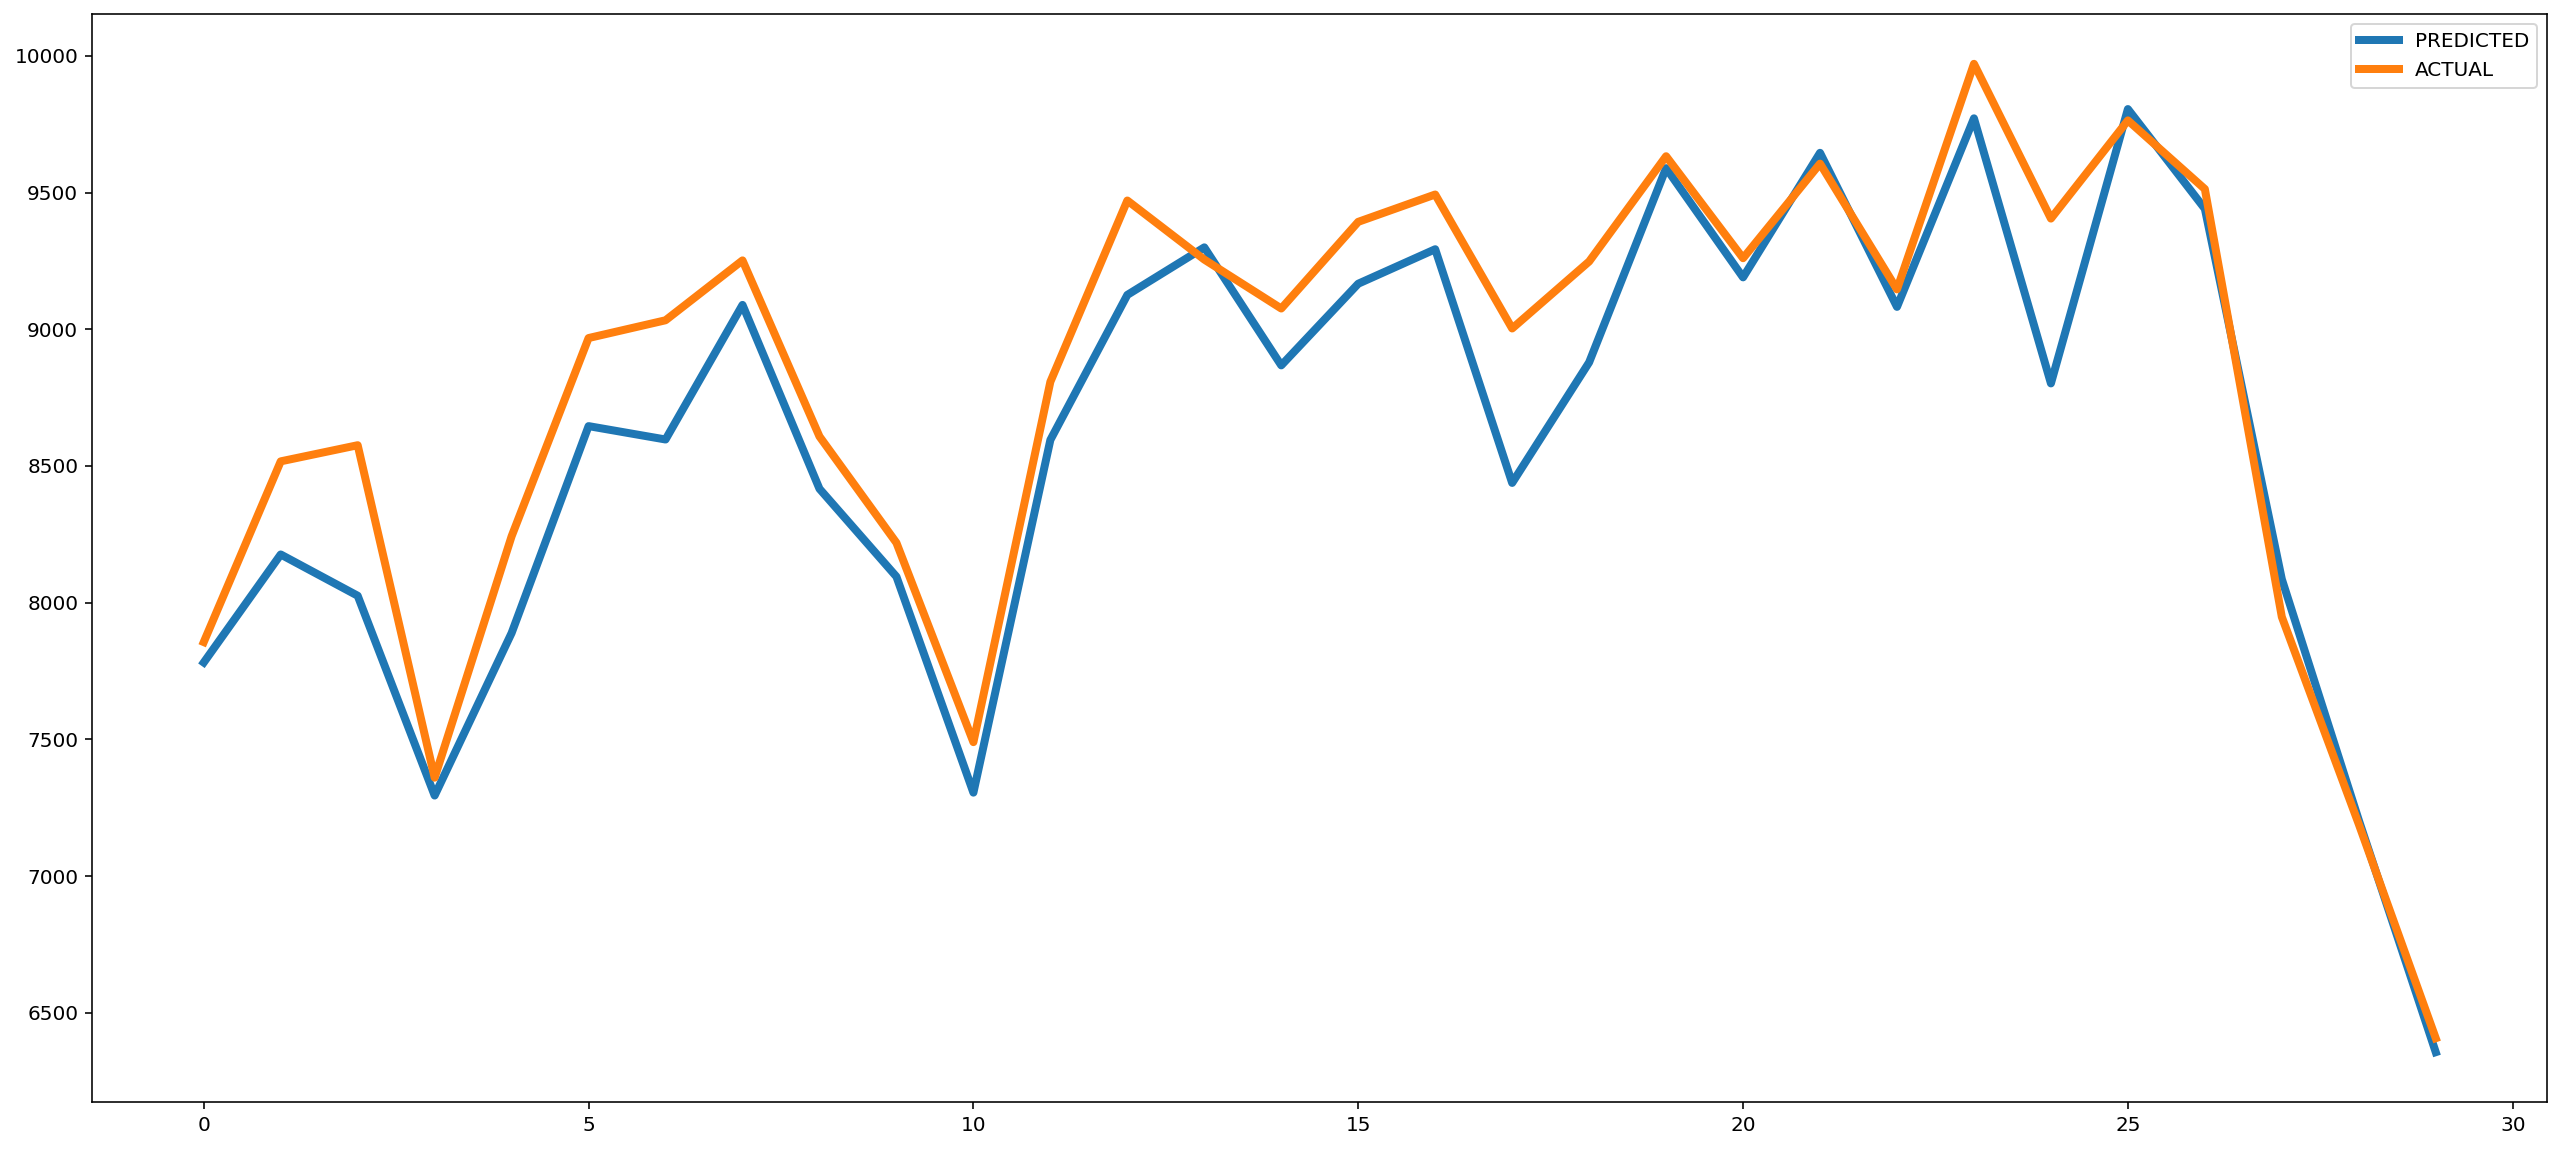

In [108]:
LSTM_MONTH_PLOT('jun',2020)


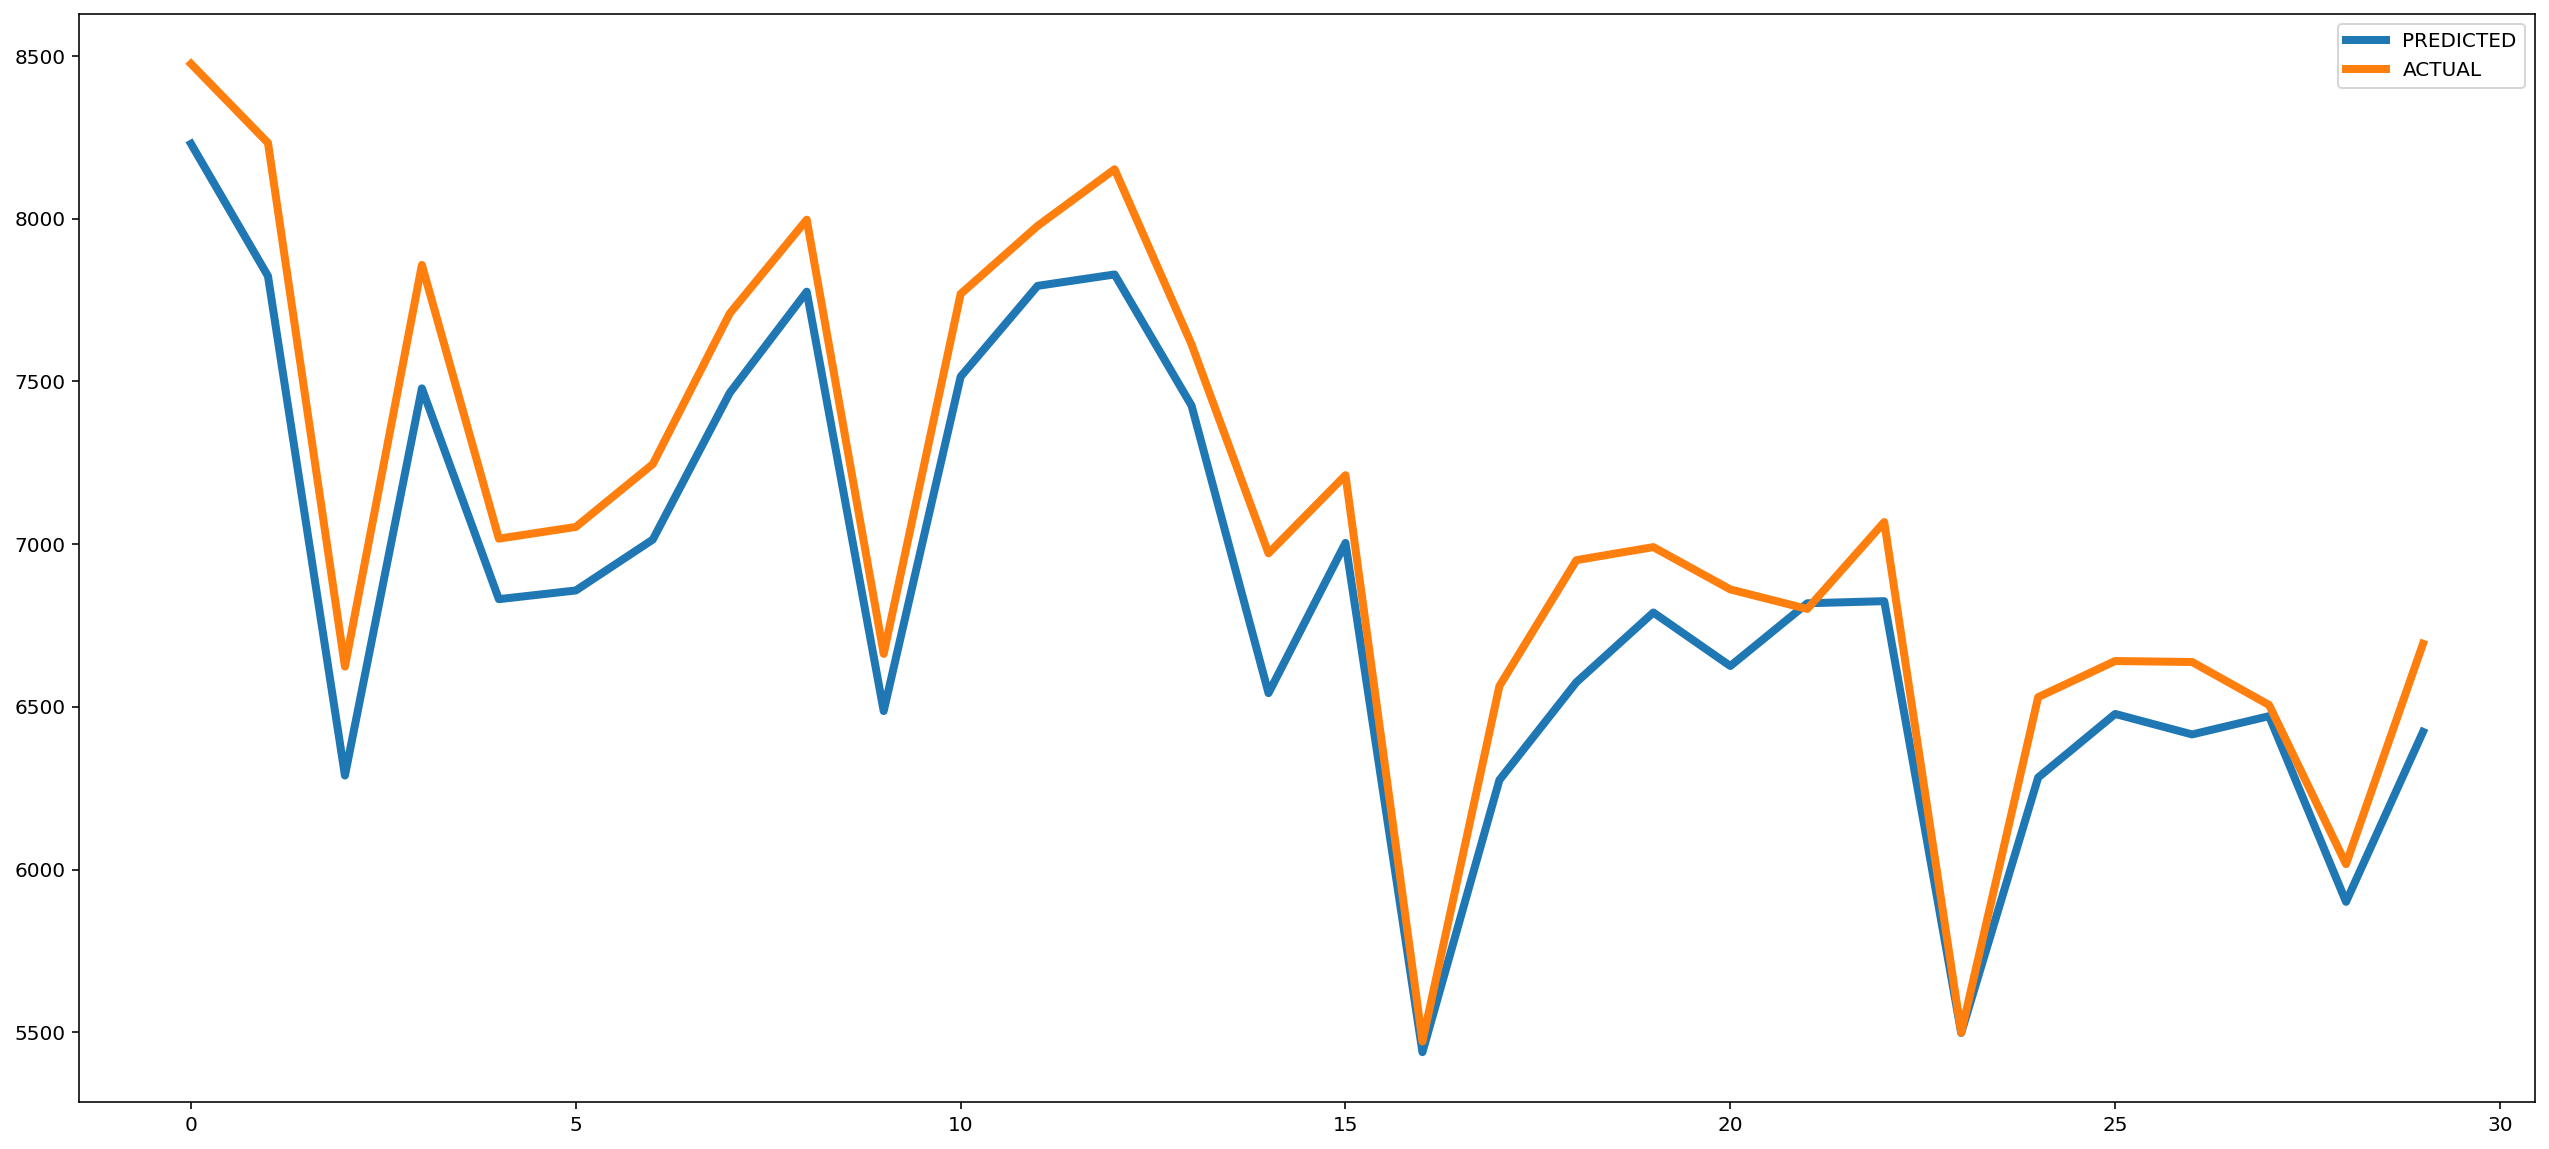

In [109]:
LSTM_MONTH_PLOT('sep',2020)


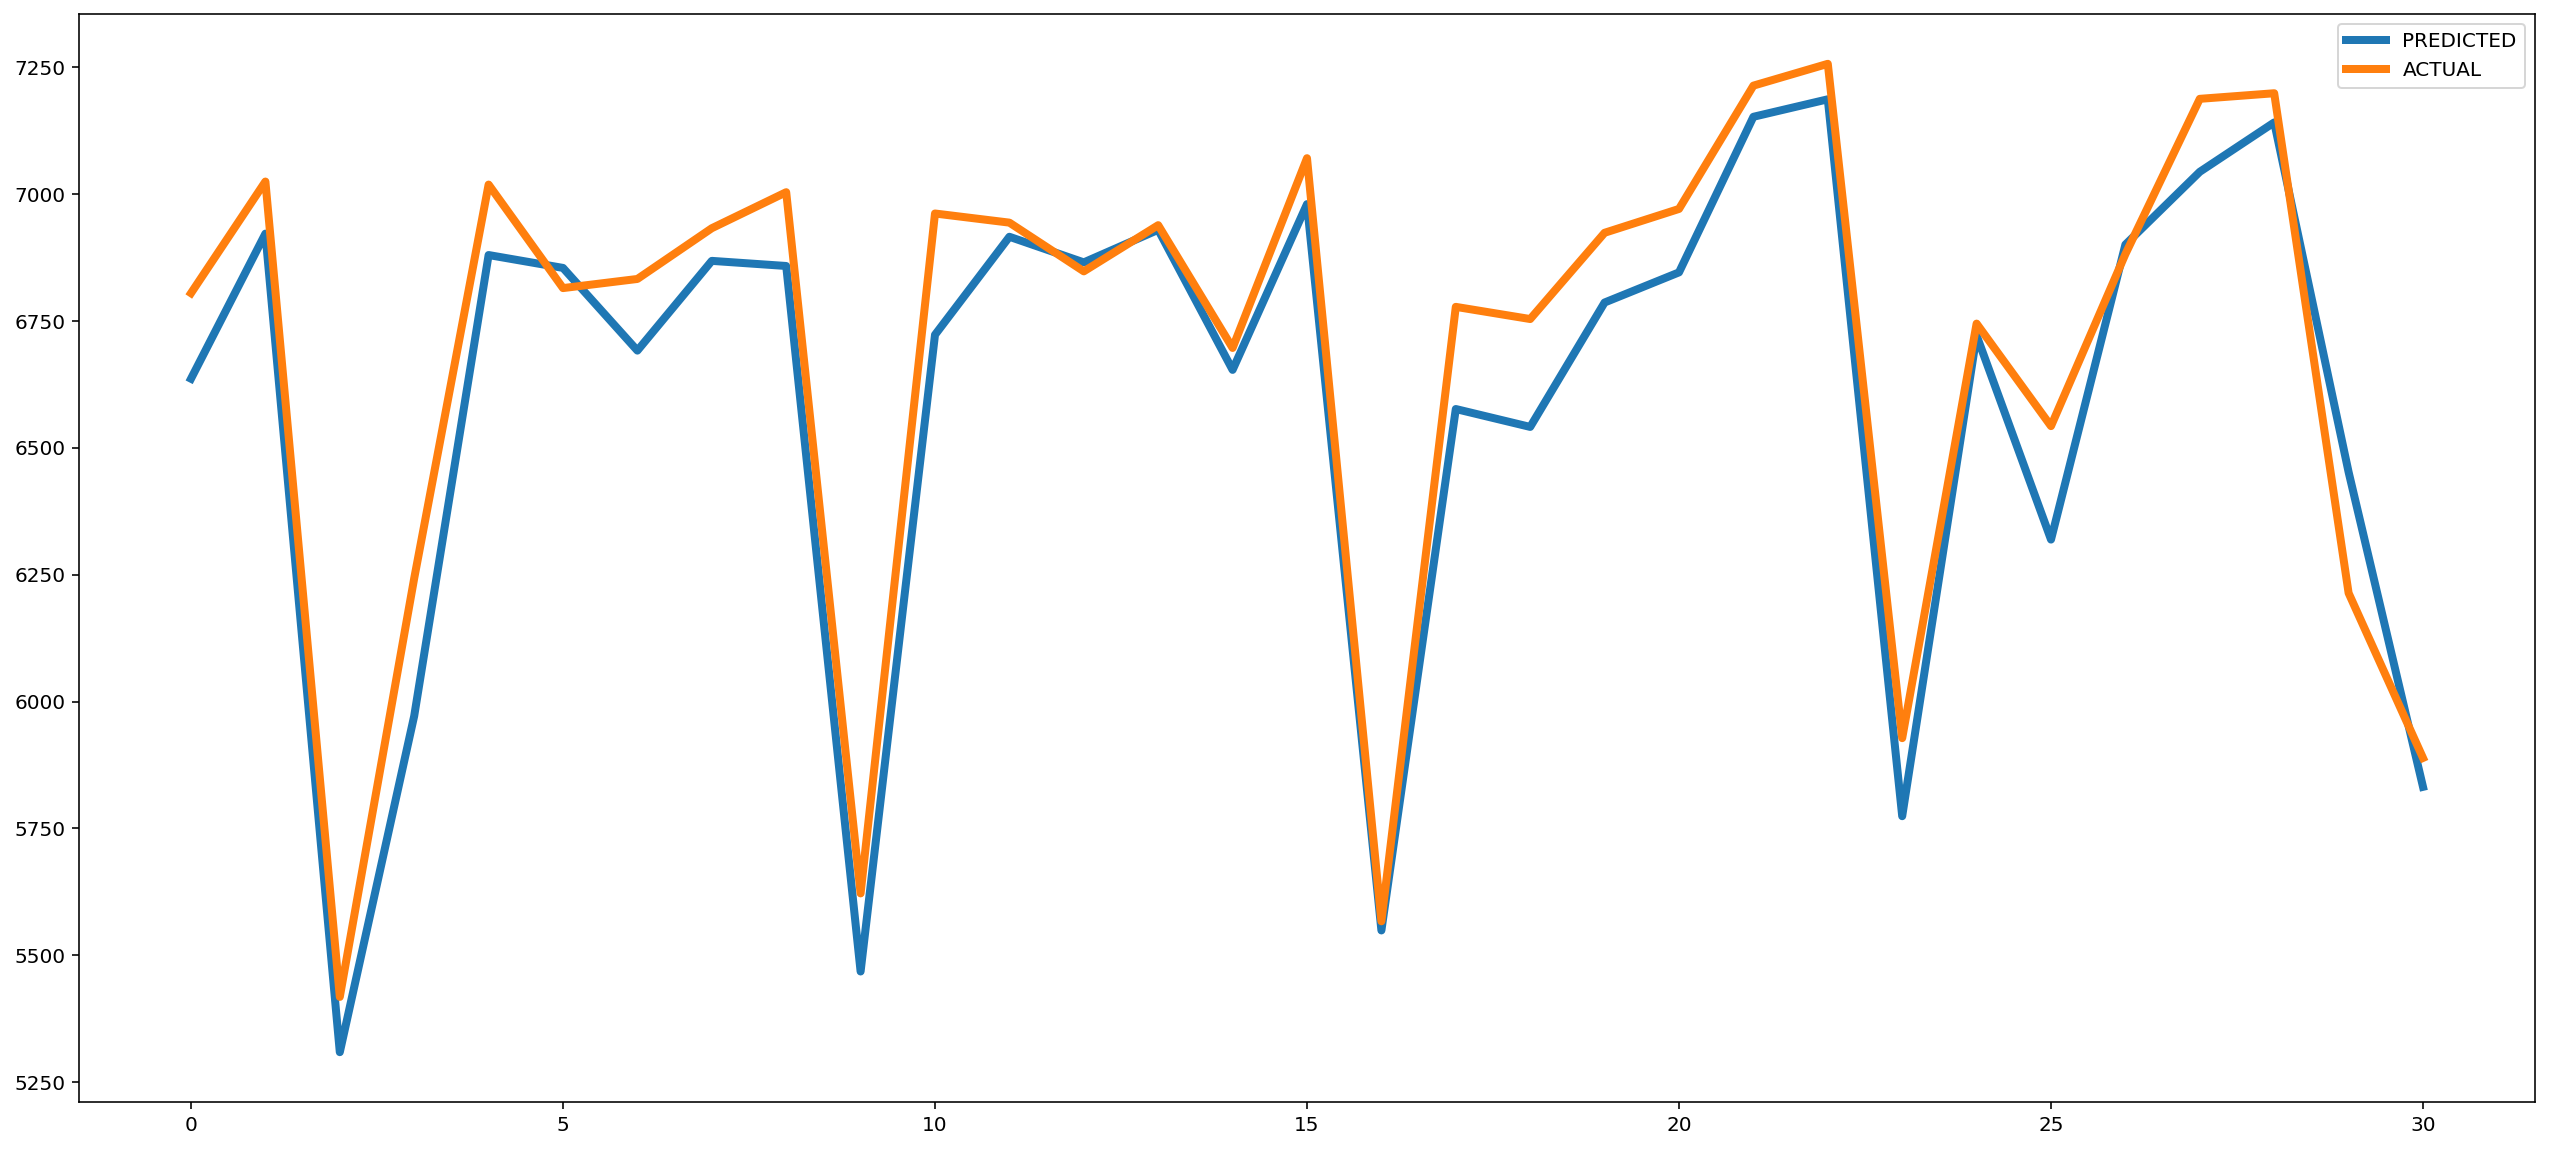

In [110]:
LSTM_MONTH_PLOT('dec',2020)
